# <center><b><big><i>Stock Market Analysis</i></big></b></center>    

### Import Important Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter,date2num, MONDAY, WeekdayLocator, DayLocator
%matplotlib inline
import seaborn as sns
import math
from mplfinance.original_flavor import candlestick_ohlc
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from sklearn import neighbors
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler

# from sklearn.metrics import accuracy_score
# scaler = MinMaxScaler(feature_range=(0, 1))


### Creating Data Frame from .CSV files
### list Of stocks that will used in the project 
#### 1. AXISBANK
#### 2. BHARTIARTL
#### 3. HDFCBANK
#### 4. RELIANCE
#### 5. TATASTEEL

In [2]:
axi = pd.read_csv("AXISBANK.csv",header=0,index_col='Date', parse_dates=True)
airtel = pd.read_csv("BHARTIARTL.csv", header=0, index_col='Date', parse_dates=True)
hdfc = pd.read_csv("HDFCBANK.csv", header=0, index_col='Date', parse_dates=True)
reliance = pd.read_csv("RELIANCE.csv", header=0, index_col='Date', parse_dates=True)
tatas = pd.read_csv("TATASTEEL.CSV", header=0, index_col='Date', parse_dates=True)

### Find Starting & Ending Range of data using head() and tail()

In [3]:
axi.head(2)

Symbol Series  Prev Close  Open  High   Low  Last  Close   VWAP  \
Date                                                                           
2000-01-03  UTIBANK     EQ        24.7  26.7  26.7  26.7  26.7  26.70  26.70   
2000-01-04  UTIBANK     EQ        26.7  27.0  28.7  26.5  27.0  26.85  27.24   

            Volume      Turnover  
Date                              
2000-01-03  112100  2.993070e+11  
2000-01-04  234500  6.387280e+11

In [4]:
axi.tail(2)

Symbol Series  Prev Close    Open    High     Low   Last  \
Date                                                                     
2020-11-26  AXISBANK     EQ      599.85  602.25  618.20  594.05  611.5   
2020-11-27  AXISBANK     EQ      612.55  612.00  613.65  598.75  605.1   

             Close    VWAP    Volume      Turnover  
Date                                                
2020-11-26  612.55  608.19  35476456  2.157650e+15  
2020-11-27  601.60  605.39  29921076  1.811380e+15

In [5]:
airtel.head(2)

Symbol Series  Prev Close   Open   High   Low   Last  Close  \
Date                                                                      
2002-02-18  BHARTI     EQ        0.00  51.90  51.90  43.5  44.70  44.35   
2002-02-19  BHARTI     EQ       44.35  45.15  45.15  41.3  41.35  41.70   

             VWAP    Volume      Turnover  
Date                                       
2002-02-18  46.00  10381190  4.775430e+13  
2002-02-19  42.58   3552660  1.512610e+13

In [6]:
airtel.tail(2)

Symbol Series  Prev Close   Open    High    Low   Last  \
Date                                                                     
2020-11-26  BHARTIARTL     EQ       464.1  468.7  469.65  460.1  469.0   
2020-11-27  BHARTIARTL     EQ       468.4  468.3  472.65  462.0  465.0   

             Close    VWAP    Volume      Turnover  
Date                                                
2020-11-26  468.40  465.71  11322533  5.273040e+14  
2020-11-27  463.25  465.57  18151096  8.450530e+14

In [7]:
hdfc.head(2)

Symbol Series  Prev Close   Open    High    Low   Last  Close  \
Date                                                                          
2000-01-03  HDFCBANK     EQ       157.4  166.0  170.00  166.0  170.0  170.0   
2000-01-04  HDFCBANK     EQ       170.0  182.0  183.45  171.0  174.0  173.8   

              VWAP  Volume      Turnover  
Date                                      
2000-01-03  169.52   33259  5.638120e+11  
2000-01-04  174.99  168710  2.952260e+12

In [8]:
hdfc.tail(2)

Symbol Series  Prev Close    Open    High      Low    Last  \
Date                                                                       
2020-11-26  HDFCBANK     EQ     1402.80  1415.0  1432.0  1387.00  1431.9   
2020-11-27  HDFCBANK     EQ     1426.65  1431.8  1446.0  1415.55  1438.0   

              Close     VWAP    Volume      Turnover  
Date                                                  
2020-11-26  1426.65  1410.64  13971563  1.970890e+15  
2020-11-27  1440.85  1429.86   8997290  1.286480e+15

In [9]:
reliance.head(2)

Symbol Series  Prev Close   Open    High    Low    Last   Close  \
Date                                                                            
2000-01-03  RELIANCE     EQ      233.05  237.5  251.70  237.5  251.70  251.70   
2000-01-04  RELIANCE     EQ      251.70  258.4  271.85  251.3  271.85  271.85   

              VWAP   Volume      Turnover  
Date                                       
2000-01-03  249.37  4456424  1.111320e+14  
2000-01-04  263.52  9487878  2.500220e+14

In [10]:
reliance.tail(2)

Symbol Series  Prev Close     Open    High      Low    Last  \
Date                                                                        
2020-11-26  RELIANCE     EQ      1947.8  1953.05  1965.0  1930.05  1957.0   
2020-11-27  RELIANCE     EQ      1952.6  1940.50  1956.1  1921.40  1940.5   

             Close     VWAP    Volume      Turnover  
Date                                                 
2020-11-26  1952.6  1946.67  11924527  2.321310e+15  
2020-11-27  1929.8  1935.45  21845931  4.228160e+15

In [11]:
tatas.head(2)

Symbol Series  Prev Close   Open   High     Low    Last   Close  \
Date                                                                         
2000-01-03  TISCO     EQ      142.35  148.0  153.2  146.10  152.50  152.45   
2000-01-04  TISCO     EQ      152.45  150.1  153.0  143.05  151.95  150.80   

              VWAP   Volume      Turnover  
Date                                       
2000-01-03  150.92  2003185  3.023160e+13  
2000-01-04  151.03  1555136  2.348790e+13

In [12]:
tatas.tail(2)

Symbol Series  Prev Close   Open    High     Low   Last  \
Date                                                                     
2020-11-26  TATASTEEL     EQ      541.25  546.0  571.10  541.25  569.4   
2020-11-27  TATASTEEL     EQ      568.40  570.0  582.35  563.05  574.9   

             Close    VWAP    Volume      Turnover  
Date                                                
2020-11-26  568.40  556.10  22570185  1.255140e+15  
2020-11-27  577.35  575.57  46291248  2.664400e+15

### Display Information of dataframe using info()

In [13]:
axi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5204 entries, 2000-01-03 to 2020-11-27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5204 non-null   object 
 1   Series      5204 non-null   object 
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   VWAP        5204 non-null   float64
 9   Volume      5204 non-null   int64  
 10  Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 447.2+ KB


In [14]:
airtel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4672 entries, 2002-02-18 to 2020-11-27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      4672 non-null   object 
 1   Series      4672 non-null   object 
 2   Prev Close  4672 non-null   float64
 3   Open        4672 non-null   float64
 4   High        4672 non-null   float64
 5   Low         4672 non-null   float64
 6   Last        4672 non-null   float64
 7   Close       4672 non-null   float64
 8   VWAP        4672 non-null   float64
 9   Volume      4672 non-null   int64  
 10  Turnover    4672 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 401.5+ KB


In [15]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5204 entries, 2000-01-03 to 2020-11-27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5204 non-null   object 
 1   Series      5204 non-null   object 
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   VWAP        5204 non-null   float64
 9   Volume      5204 non-null   int64  
 10  Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 447.2+ KB


In [16]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5204 entries, 2000-01-03 to 2020-11-27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5204 non-null   object 
 1   Series      5204 non-null   object 
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   VWAP        5204 non-null   float64
 9   Volume      5204 non-null   int64  
 10  Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 447.2+ KB


In [17]:
tatas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5204 entries, 2000-01-03 to 2020-11-27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5204 non-null   object 
 1   Series      5204 non-null   object 
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   VWAP        5204 non-null   float64
 9   Volume      5204 non-null   int64  
 10  Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 447.2+ KB


### Check dataset has missing value or not

In [18]:
axi.isnull().any()

Symbol        False
Series        False
Prev Close    False
Open          False
High          False
Low           False
Last          False
Close         False
VWAP          False
Volume        False
Turnover      False
dtype: bool

In [19]:
airtel.isnull().any()

Symbol        False
Series        False
Prev Close    False
Open          False
High          False
Low           False
Last          False
Close         False
VWAP          False
Volume        False
Turnover      False
dtype: bool

In [20]:
hdfc.isnull().any()

Symbol        False
Series        False
Prev Close    False
Open          False
High          False
Low           False
Last          False
Close         False
VWAP          False
Volume        False
Turnover      False
dtype: bool

In [21]:
tatas.isnull().any()

Symbol        False
Series        False
Prev Close    False
Open          False
High          False
Low           False
Last          False
Close         False
VWAP          False
Volume        False
Turnover      False
dtype: bool

### to print statistical data like percentile, mean and std of dataframes

In [22]:
tatas.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    397.189345   398.023395   404.818572   390.390238   397.185348   
std     183.065014   183.432717   186.462003   179.772927   182.996598   
min      67.250000    66.000000    69.700000    66.000000    67.300000   
25%     271.975000   272.000000   279.150000   266.000000   272.000000   
50%     399.800000   400.225000   406.850000   393.850000   399.925000   
75%     516.275000   517.350000   524.312500   508.362500   516.625000   
max     988.900000   997.300000  1048.000000   966.250000   993.000000   

             Close         VWAP        Volume      Turnover  
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03  
mean    397.272934   397.795690  5.865648e+06  2.406219e+14  
std     183.047941   183.208514  4.763804e+06  2.123724e+14  
min      67.250000    67.970000  2.329100e+04  2.159160e+11  
25%     272.000000   272.395000  2.766329e+06  1.098408e+14  
50%     399.825000   400.690000  4.705040e+06  1.921460e+14  
75%     516.487500   516.972500  7.606124e+06  3.276500e+14  
max     988.900000  1006.010000  6.428460e+07  3.360160e+15

In [23]:
axi.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    583.860002   584.600029   594.549039   573.677219   583.975942   
std     440.698723   440.583630   447.085962   434.030670   440.589453   
min      22.150000    21.000000    23.700000    21.000000    22.150000   
25%     227.200000   227.500000   231.987500   222.212500   227.537500   
50%     514.125000   515.000000   521.950000   507.075000   514.025000   
75%     905.262500   905.212500   920.200000   882.087500   903.475000   
max    2023.350000  2034.400000  2043.050000  2002.600000  2022.550000   

             Close         VWAP        Volume      Turnover  
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03  
mean    583.970859   584.163178  4.256712e+06  2.546893e+14  
std     440.630594   440.593933  7.851790e+06  3.832740e+14  
min      22.150000    22.170000  2.850000e+03  8.275250e+09  
25%     227.537500   227.757500  2.719952e+05  5.293305e+12  
50%     514.200000   515.060000  1.577827e+06  1.605225e+14  
75%     905.262500   903.617500  5.145555e+06  3.333198e+14  
max    2023.350000  2020.310000  1.205419e+08  7.179550e+15

In [24]:
hdfc.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    997.948328   998.267179  1010.719350   984.770417   998.208878   
std     638.481104   638.133600   644.158911   632.202775   638.437227   
min     157.400000   162.150000   167.900000   157.000000   163.000000   
25%     470.637500   470.000000   476.550000   463.750000   471.712500   
50%     915.675000   919.575000   935.000000   901.575000   915.700000   
75%    1389.912500  1390.225000  1412.150000  1360.837500  1391.175000   
max    2565.800000  2566.000000  2583.300000  2553.700000  2563.000000   

             Close         VWAP        Volume      Turnover  
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03  
mean    998.194956   997.778255  1.943375e+06  2.202933e+14  
std     638.404237   638.195463  3.806884e+06  4.429445e+14  
min     163.400000   161.400000  1.042000e+03  2.291142e+10  
25%     471.212500   470.087500  2.931628e+05  1.534602e+13  
50%     915.875000   917.440000  9.140735e+05  1.115150e+14  
75%    1389.987500  1390.080000  2.024575e+06  2.067470e+14  
max    2565.800000  2570.700000  1.005650e+08  1.430000e+16

In [25]:
reliance.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    991.573146   993.152488  1007.210386   977.650846   991.744716   
std     559.193166   560.779485   570.274651   548.810030   559.142833   
min     203.200000   205.500000   219.500000   197.150000   203.300000   
25%     564.125000   565.987500   574.575000   555.350000   563.825000   
50%     929.400000   930.975000   941.675000   920.000000   929.550000   
75%    1210.675000  1211.000000  1231.662500  1193.075000  1213.550000   
max    3220.850000  3298.000000  3298.000000  3141.300000  3223.000000   

             Close         VWAP        Volume      Turnover  
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03  
mean    991.899193   992.505048  5.477416e+06  5.766117e+14  
std     559.245468   559.404639  4.939589e+06  8.066053e+14  
min     203.200000   212.290000  5.282000e+04  4.295540e+12  
25%     564.600000   563.172500  2.818465e+06  2.172170e+14  
50%     929.600000   930.265000  4.153304e+06  3.597580e+14  
75%    1210.750000  1211.957500  6.424490e+06  6.388228e+14  
max    3220.850000  3197.750000  6.523089e+07  1.470000e+16

In [26]:
airtel.describe()

Prev Close         Open         High          Low         Last  \
count  4672.000000  4672.000000  4672.000000  4672.000000  4672.000000   
mean    376.159546   376.912746   383.476702   369.164587   376.254773   
std     208.032460   208.545750   212.890456   202.968414   207.947768   
min       0.000000    21.100000    21.600000    20.650000    20.700000   
25%     299.837500   300.562500   305.300000   295.000000   300.000000   
50%     346.825000   347.500000   352.000000   341.525000   347.000000   
75%     416.362500   417.512500   422.962500   410.125000   416.025000   
max    1125.650000  1133.900000  1184.200000  1090.250000  1131.350000   

             Close         VWAP        Volume      Turnover  
count  4672.000000  4672.000000  4.672000e+03  4.672000e+03  
mean    376.258701   376.273953  5.029917e+06  2.058961e+14  
std     207.963520   207.724912  7.131872e+06  3.426430e+14  
min      20.750000    20.960000  2.824600e+04  7.373966e+10  
25%     299.925000   300.120000  1.785737e+06  5.395588e+13  
50%     346.875000   346.990000  3.420234e+06  1.234870e+14  
75%     416.400000   416.730000  5.722272e+06  2.284878e+14  
max    1125.650000  1113.580000  1.868565e+08  9.595640e+15

### Check unique value of symbol (if found then replace it with same name) 

In [27]:
axi['Symbol'].unique()

array(['UTIBANK', 'AXISBANK'], dtype=object)

In [28]:
# Before 10 years it's name is UTIbank so we need to replace it with it's current name.
axi = axi.replace('UTIBANK', 'AXISBANK')

In [29]:
tatas['Symbol'].unique()

array(['TISCO', 'TATASTEEL'], dtype=object)

In [30]:
#Before 10 years it's name is TISCO so we need to replace it with it's current name.
tatas=tatas.replace('TISCO', 'TATASTEEL')

In [31]:
hdfc['Symbol'].unique()

array(['HDFCBANK'], dtype=object)

In [32]:
reliance['Symbol'].unique()

array(['RELIANCE'], dtype=object)

In [33]:
airtel['Symbol'].unique()

array(['BHARTI', 'BHARTIARTL'], dtype=object)

In [34]:
#Before 10 years it's name is BHARTI so we need to replace it with it's current name.
airtel=airtel.replace('BHARTI', 'BHARTIARTL')

### Visualization of closing price of each stock

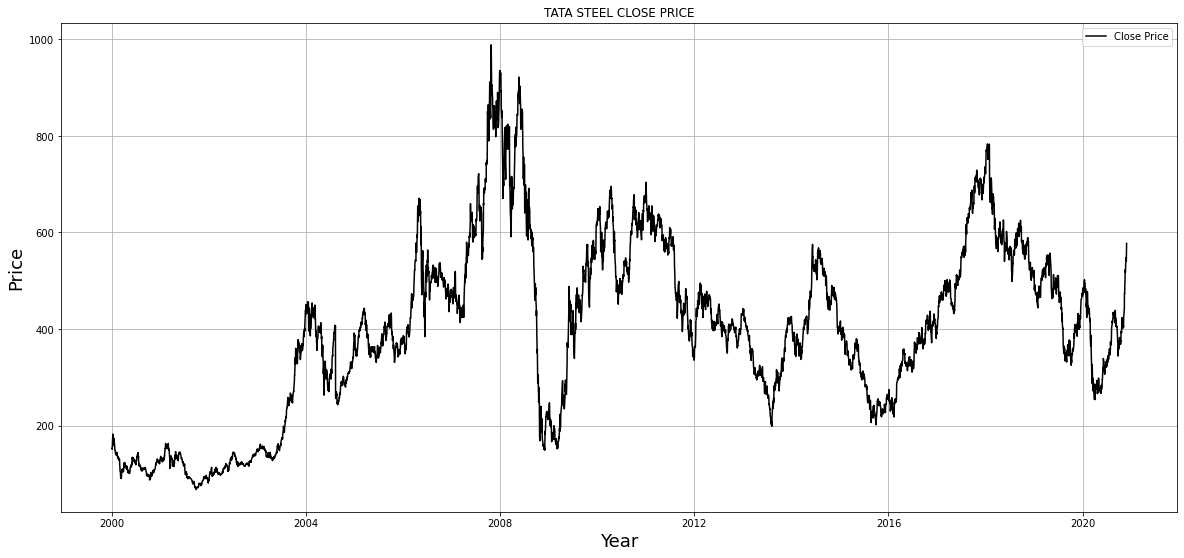

In [35]:

plt.figure(figsize=(20,9))
plt.plot(tatas['Close'],label='Close Price',color='Black')
plt.grid(True)
plt.title('TATA STEEL CLOSE PRICE')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

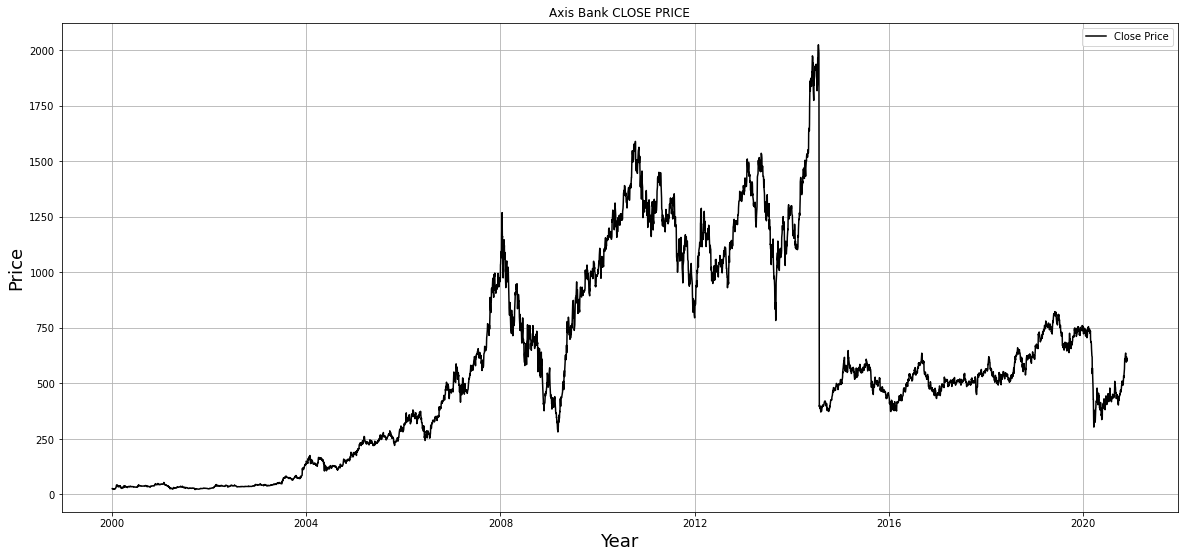

In [36]:

plt.figure(figsize=(20,9))
plt.plot(axi['Close'],label='Close Price',color='Black')
plt.grid(True)
plt.title('Axis Bank CLOSE PRICE')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

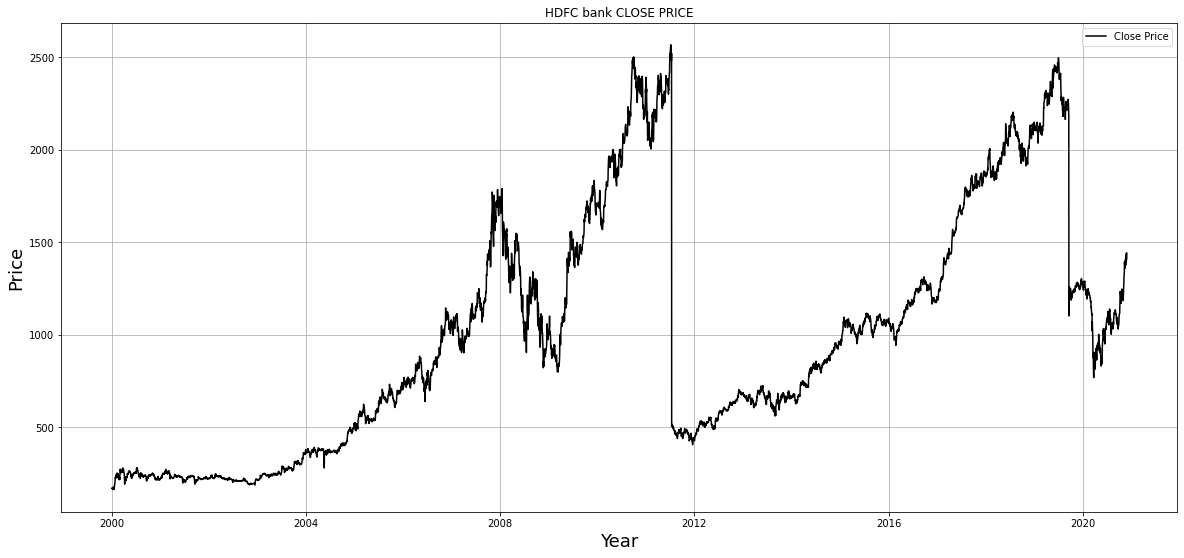

In [37]:

plt.figure(figsize=(20,9))
plt.plot(hdfc['Close'],label='Close Price',color='Black')
plt.grid(True)
plt.title('HDFC bank CLOSE PRICE')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

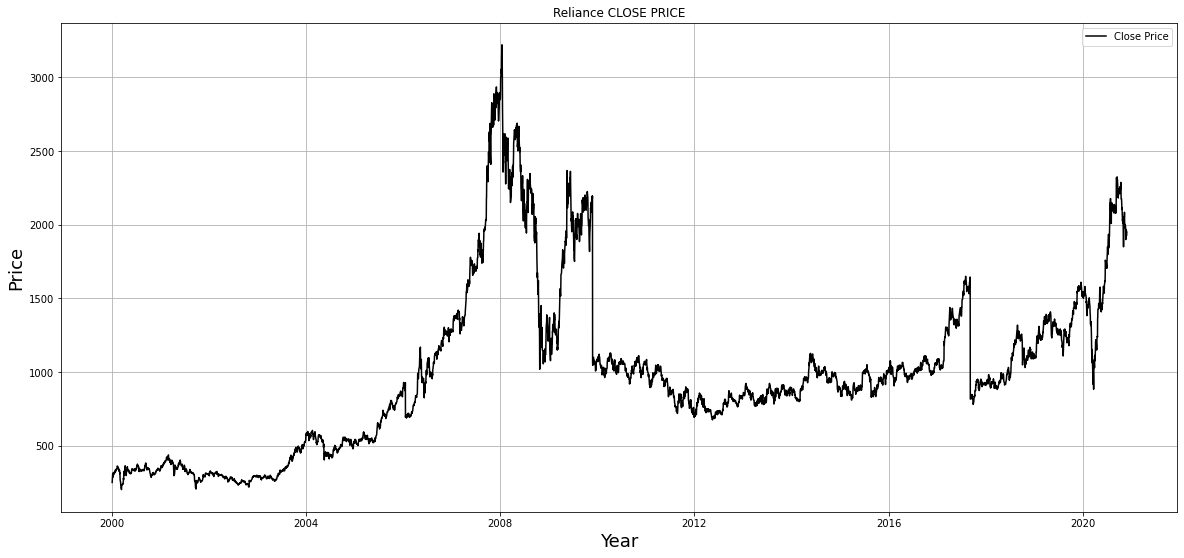

In [38]:

plt.figure(figsize=(20,9))
plt.plot(reliance['Close'],label='Close Price',color='Black')
plt.grid(True)
plt.title('Reliance CLOSE PRICE')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

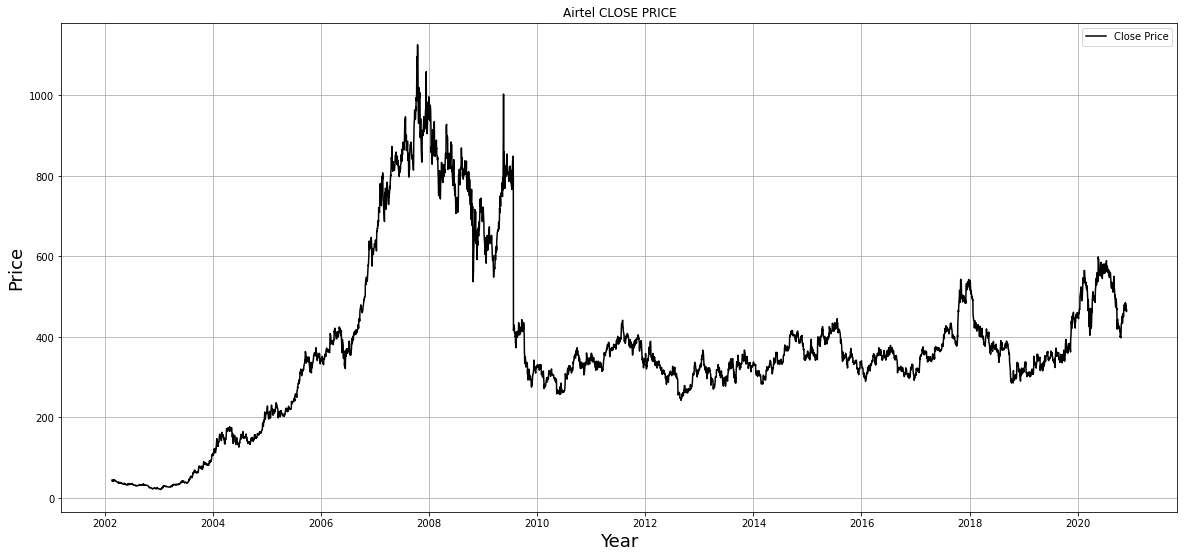

In [39]:
plt.figure(figsize=(20,9))
plt.plot(airtel['Close'],label='Close Price',color='Black')
plt.grid(True)
plt.title('Airtel CLOSE PRICE')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

### Comparison Of all stock Closing price

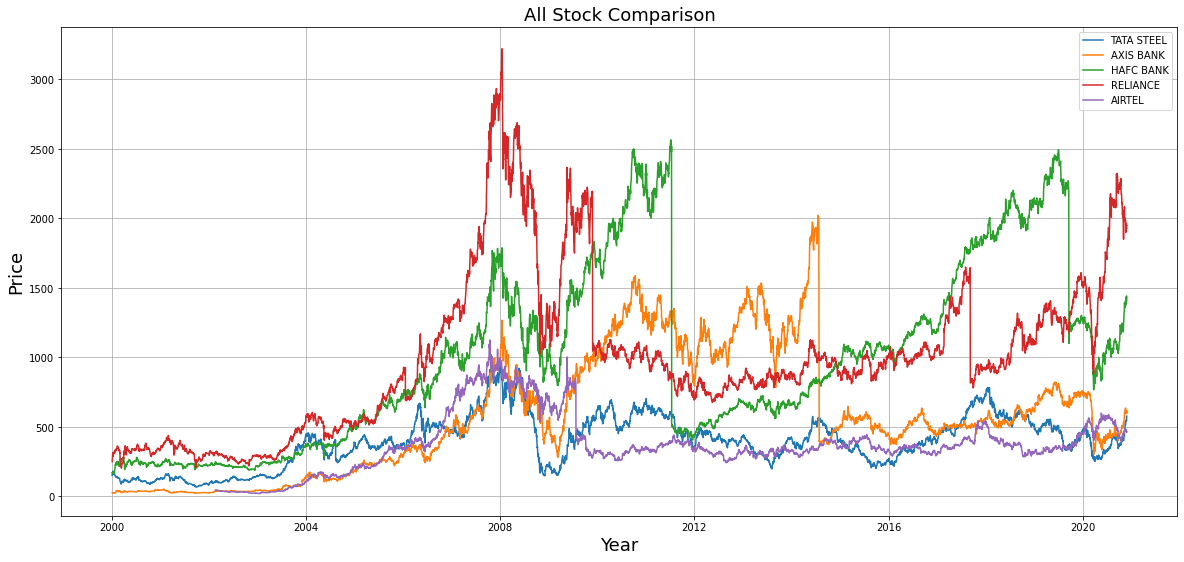

In [40]:
plt.figure(figsize=(20,9))
plt.plot(tatas['Close'],label='TATA STEEL')
plt.plot(axi['Close'],label='AXIS BANK')
plt.plot(hdfc['Close'],label='HAFC BANK')
plt.plot(reliance['Close'],label='RELIANCE')
plt.plot(airtel['Close'],label='AIRTEL')
plt.grid(True)
plt.title('All Stock Comparison', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

### Visualization of Volume Price Of Every Stock

<function matplotlib.pyplot.show(close=None, block=None)>

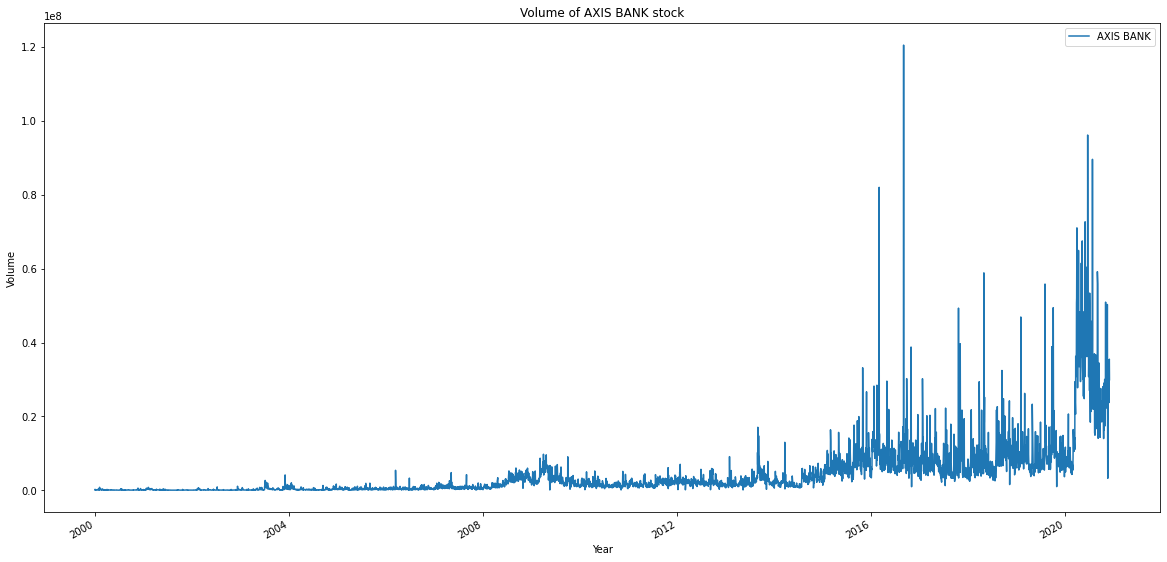

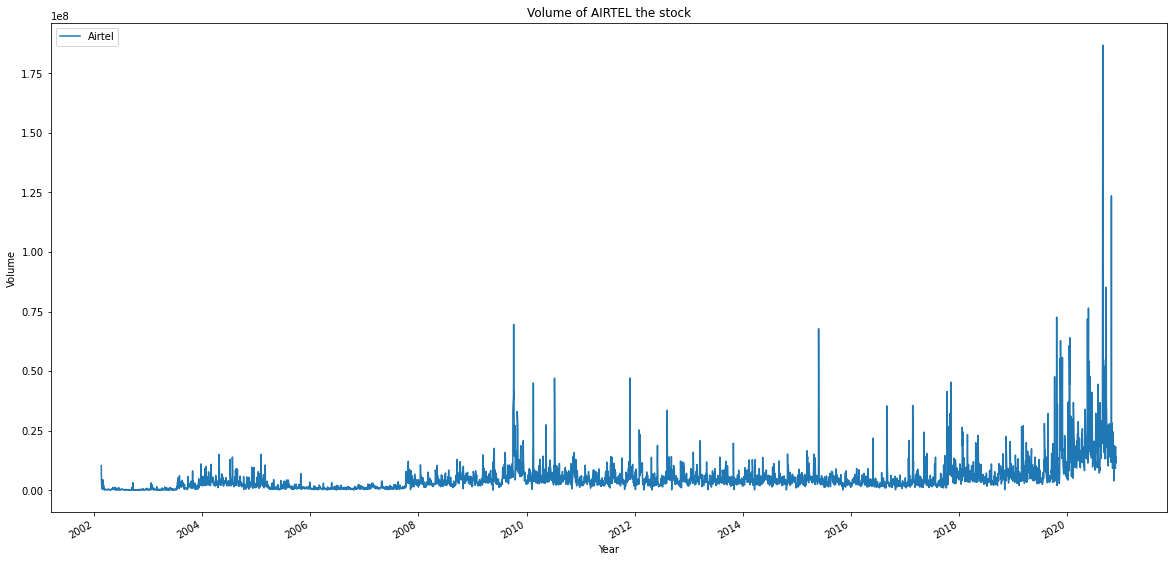

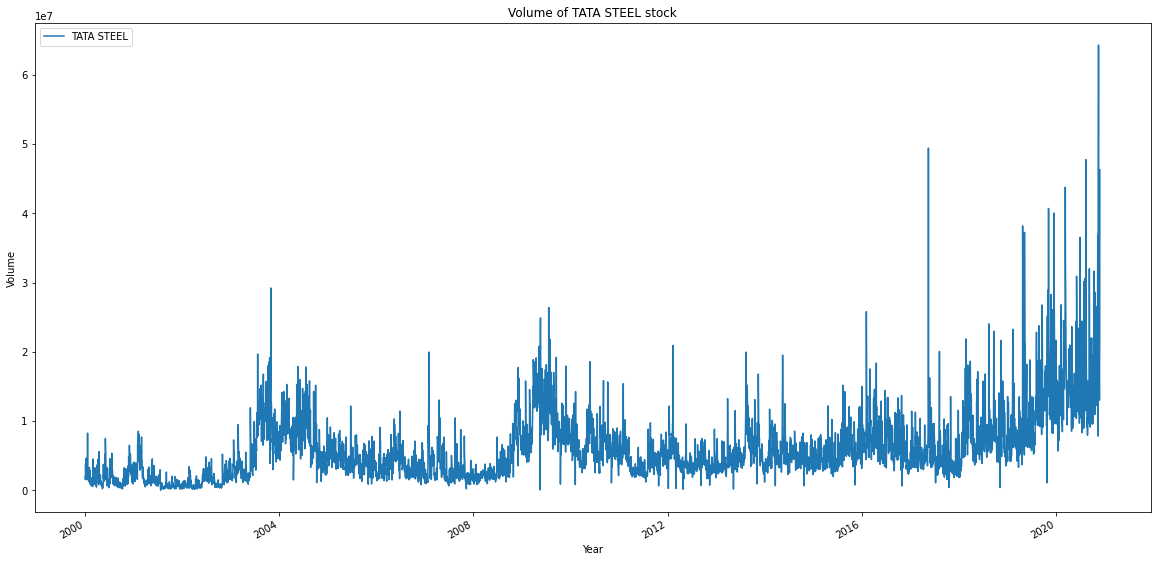

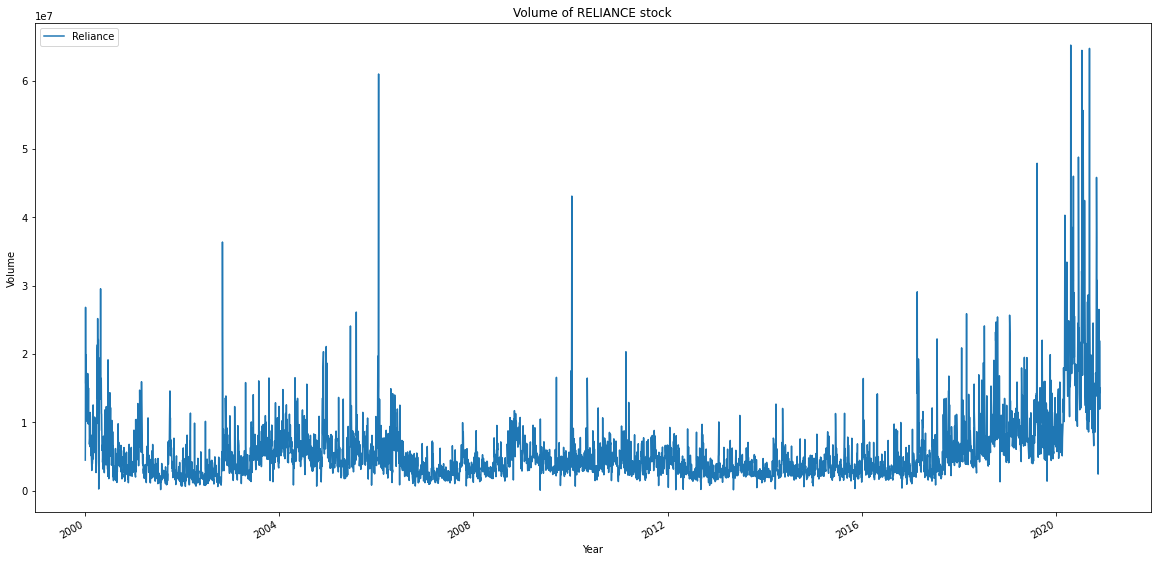

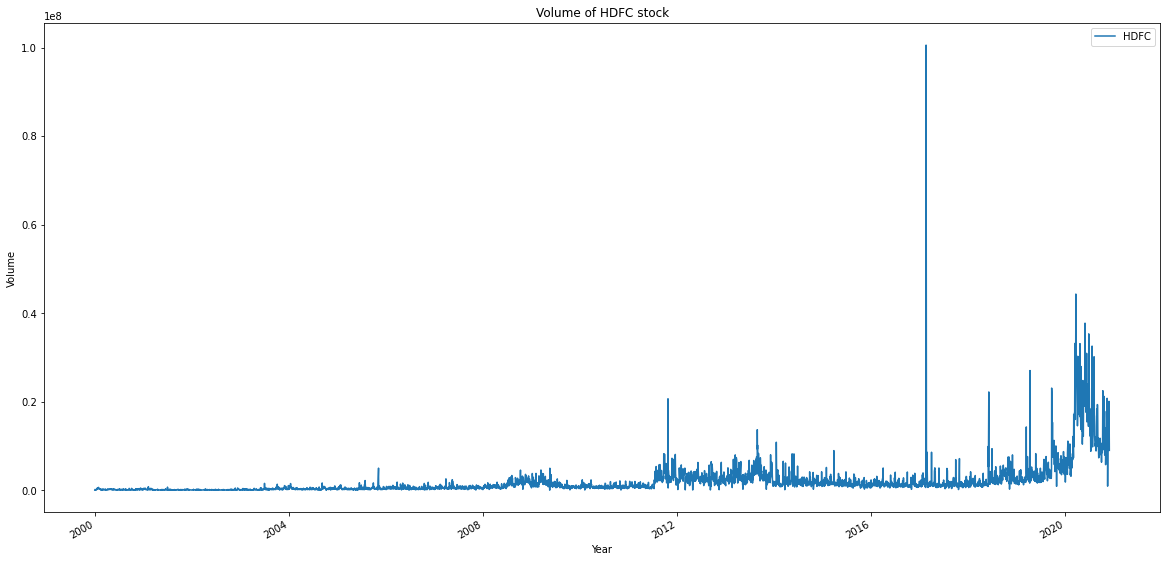

In [41]:
plt.figure(figsize=(20,10))
axi['Volume'].plot(label='AXIS BANK')
plt.legend()
plt.title("Volume of AXIS BANK stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

plt.figure(figsize=(20,10))
airtel['Volume'].plot(label='Airtel')
plt.legend()
plt.title("Volume of AIRTEL the stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

plt.figure(figsize=(20,10))
tatas['Volume'].plot(label='TATA STEEL')
plt.legend()
plt.title("Volume of TATA STEEL stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

plt.figure(figsize=(20,10))
reliance['Volume'].plot(label='Reliance')
plt.legend()
plt.title("Volume of RELIANCE stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

plt.figure(figsize=(20,10))
hdfc['Volume'].plot(label='HDFC')
plt.legend()
plt.title("Volume of HDFC stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

### Comparison Of all stock Volume

<function matplotlib.pyplot.show(close=None, block=None)>

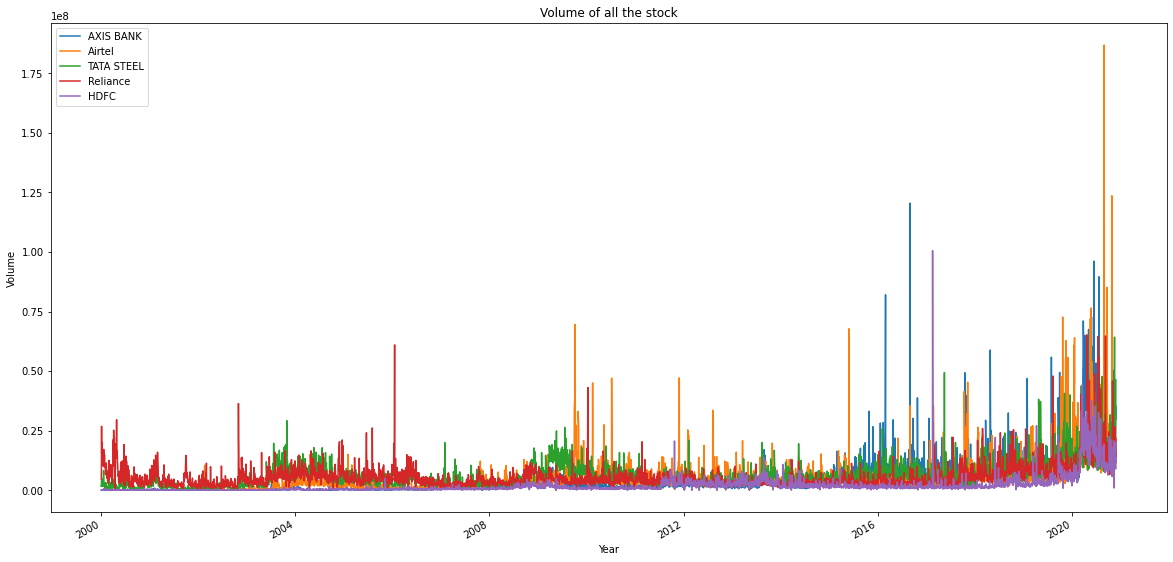

In [42]:
plt.figure(figsize=(20,10))
axi['Volume'].plot(label='AXIS BANK')
airtel['Volume'].plot(label='Airtel')
tatas['Volume'].plot(label='TATA STEEL')
reliance['Volume'].plot(label='Reliance')
hdfc['Volume'].plot(label='HDFC')
plt.legend()
plt.title("Volume of all the stock")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show

### Visualization of Closing Price Of Every Stock(Year 2020)

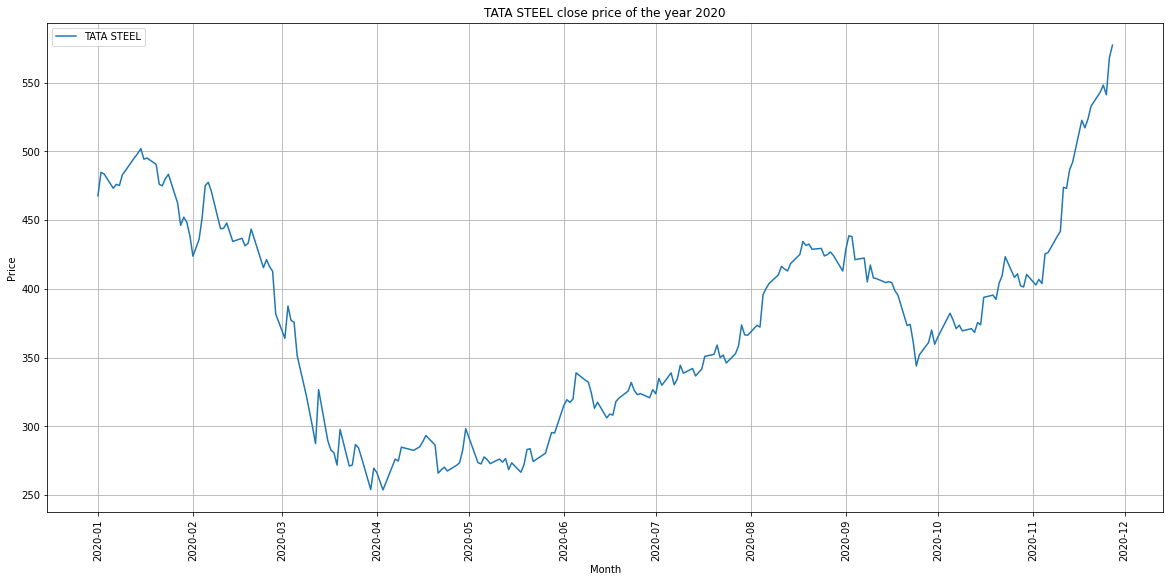

In [43]:
tatas_20 = tatas.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-27')]
plt.figure(figsize=(20,9))
plt.plot(tatas_20.index, tatas_20['Close'],label='TATA STEEL')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.title('TATA STEEL close price of the year 2020')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.show()

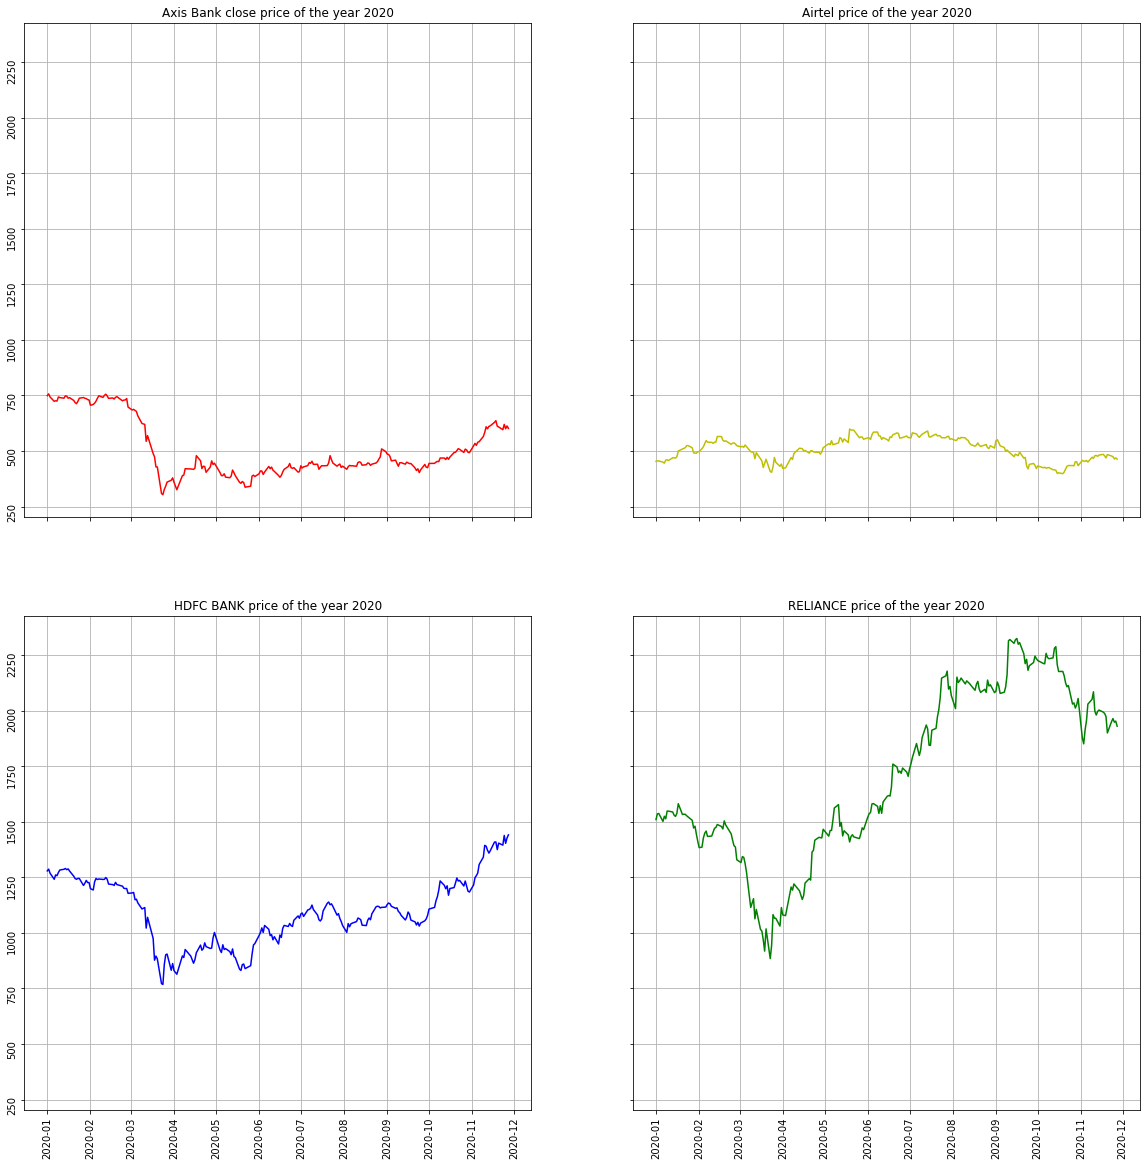

In [44]:
f, ax = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

axi_20 = axi.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-27')]
ax[0,0].plot(axi_20.index, axi_20['Close'],color='r',label='AXIS BANK')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Axis Bank close price of the year 2020');


airtel_20 = airtel.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-27')]
ax[0,1].plot(airtel_20.index, airtel_20['Close'],color='y',label='Airtel')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Airtel price of the year 2020');


hdfc_20 = hdfc.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-27')]
ax[1,0].plot(hdfc_20.index, hdfc_20['Close'],color='b',label='HDFC BANK')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('HDFC BANK price of the year 2020');


reliance_20= reliance.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-27')]
ax[1,1].plot(reliance_20.index, reliance_20['Close'],color='g',label='Reliance')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('RELIANCE price of the year 2020');


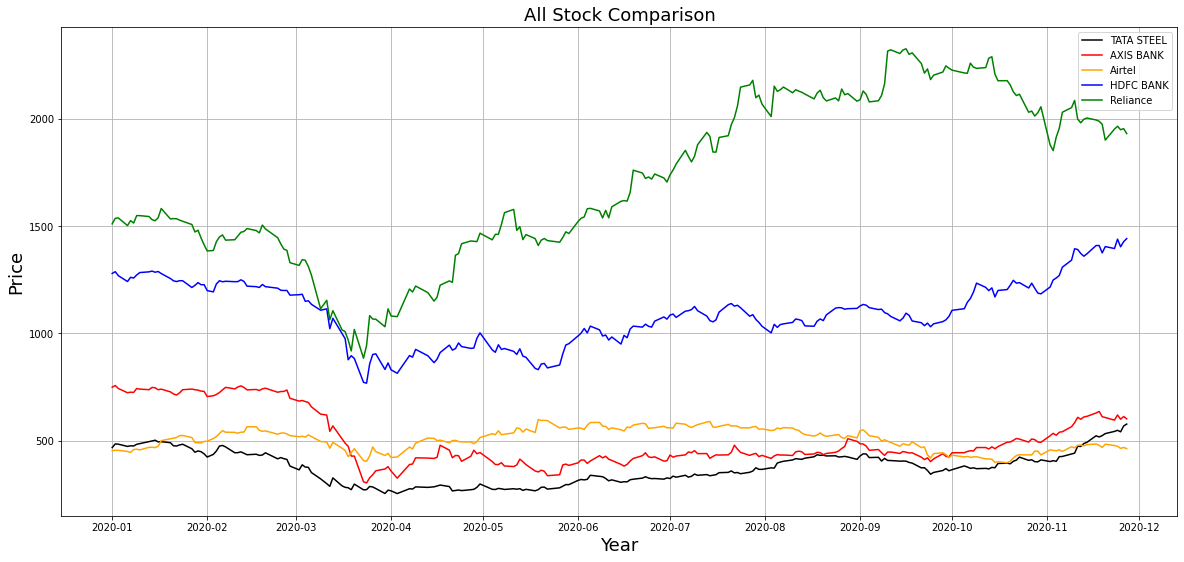

In [45]:
# Comparison of each stock closing price(year 2020)
plt.figure(figsize=(20,9))
plt.plot(tatas_20.index, tatas_20['Close'], color='black',label='TATA STEEL')
plt.plot(axi_20.index, axi_20['Close'],color='red',label='AXIS BANK')
plt.plot(airtel_20.index, airtel_20['Close'],color='orange',label='Airtel')
plt.plot(hdfc_20.index, hdfc_20['Close'],color='blue',label='HDFC BANK')
plt.plot(reliance_20.index, reliance_20['Close'],color='green',label='Reliance')
plt.grid(True)
plt.title('All Stock Comparison', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

### Resampling Of Each stock Closing price Month wise(2020)

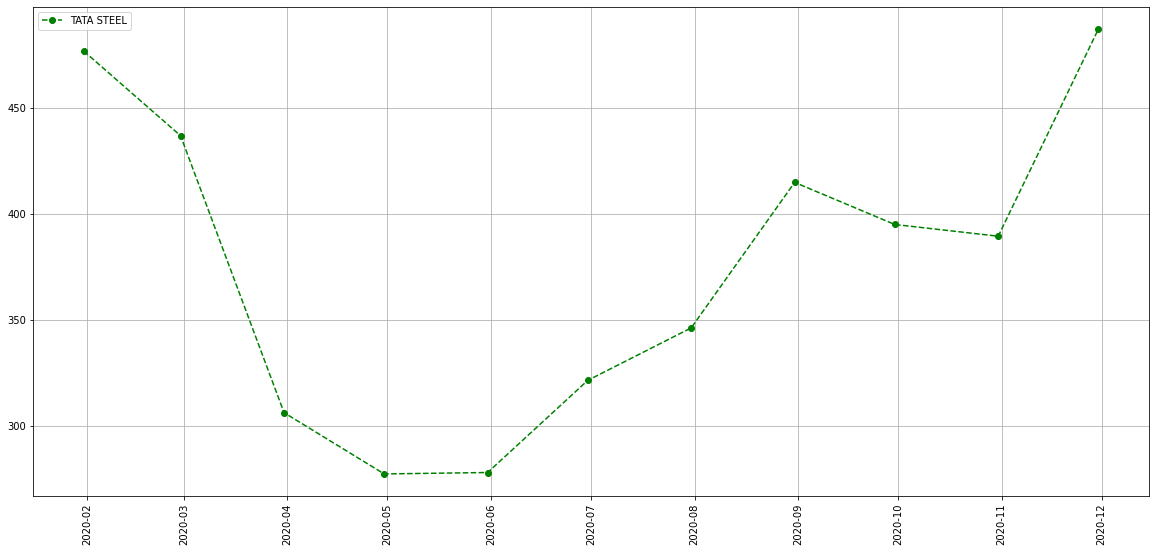

In [46]:
monthly_tatas_20 = tatas_20.resample('1M').mean()
plt.figure(figsize=(20,9))
plt.plot(monthly_tatas_20.index,monthly_tatas_20['Close'], color='green',label='TATA STEEL',marker='o',linestyle='--')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.legend()
plt.show()


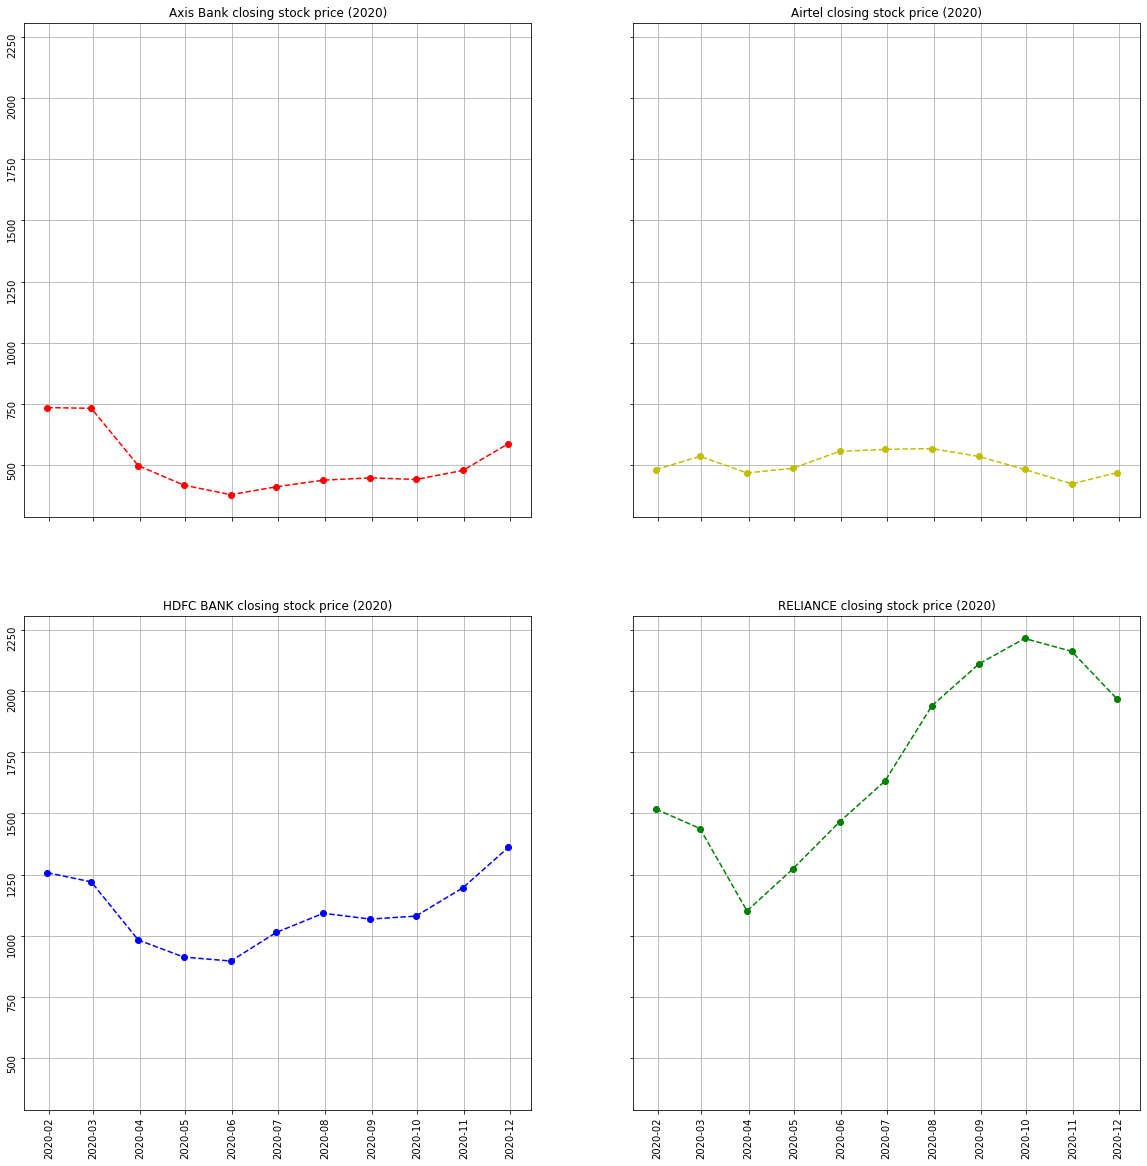

In [47]:
f, ax = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

monthly_axi_20 = axi_20.resample('1M').mean()
ax[0,0].plot(monthly_axi_20.index, monthly_axi_20['Close'], '--', color='r',label='AXIS BANK',marker='o')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Axis Bank closing stock price (2020)');


monthly_airtel_20 = airtel_20.resample('1M').mean()
ax[0,1].plot(monthly_airtel_20.index,monthly_airtel_20['Close'], '--' ,color='y',label='Airtel',marker='o')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Airtel closing stock price (2020)');


monthly_hdfc_20 = hdfc_20.resample('1M').mean()
ax[1,0].plot(monthly_hdfc_20.index, monthly_hdfc_20['Close'], '--' ,color='b',label='HDFC BANK',marker='o')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('HDFC BANK closing stock price (2020)');

monthly_reliance_20 = reliance_20.resample('1M').mean()
ax[1,1].plot(monthly_reliance_20.index, monthly_reliance_20['Close'], '--' ,color='g',label='Reliance',marker='o')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('RELIANCE closing stock price (2020)');

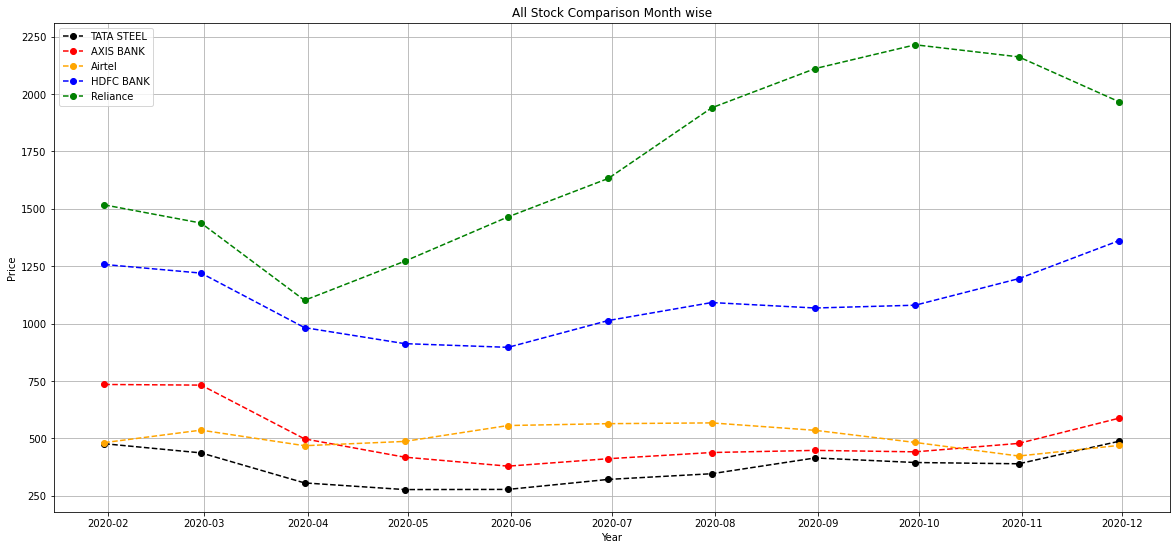

In [48]:
# Resampling of each stock closing price Month wise(2020)
plt.figure(figsize=(20,9))
plt.plot(monthly_tatas_20.index,monthly_tatas_20['Close'],'--', color='black',label='TATA STEEL',marker='o')
plt.plot(monthly_axi_20.index, monthly_axi_20['Close'], '--', color='red',label='AXIS BANK',marker='o')
plt.plot(monthly_airtel_20.index,monthly_airtel_20['Close'], '--' ,color='orange',label='Airtel',marker='o')
plt.plot(monthly_hdfc_20.index, monthly_hdfc_20['Close'], '--' ,color='blue',label='HDFC BANK',marker='o')
plt.plot(monthly_reliance_20.index, monthly_reliance_20['Close'], '--' ,color='green',label='Reliance',marker='o')
plt.grid(True)
plt.title('All Stock Comparison Month wise')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Resampling Of Each stock Closing price week wise(2020)

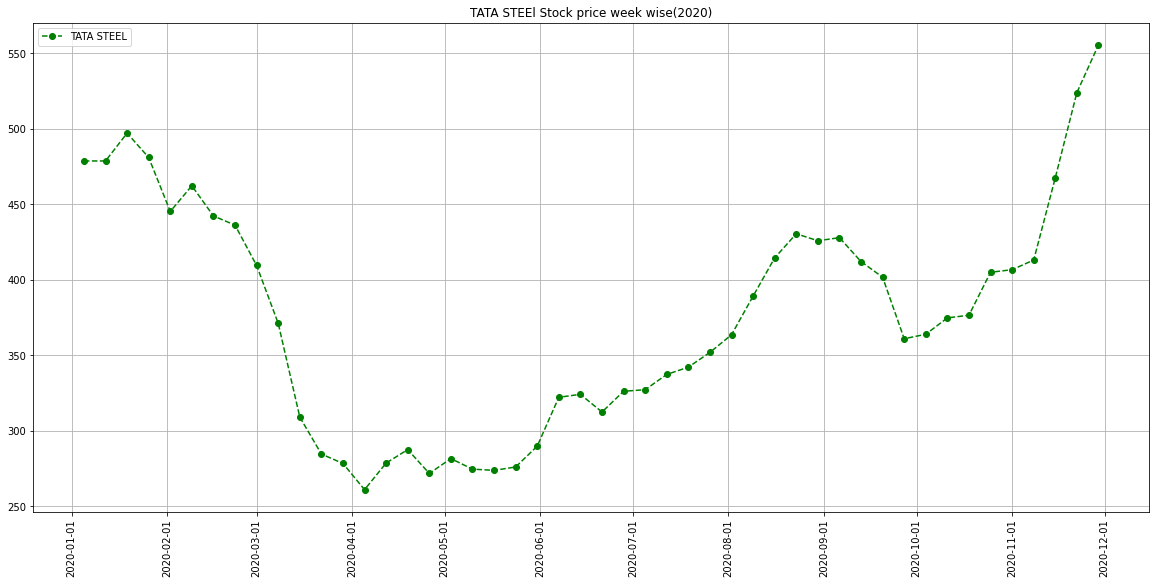

In [49]:
week_tatas = tatas.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-11-30')]
weekly_tatas_20 = week_tatas.resample('W').mean()

plt.figure(figsize=(20,9))
plt.plot(weekly_tatas_20.index,weekly_tatas_20['Close'],color='green',label='TATA STEEL',marker='o',linestyle='--')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.title('TATA STEEl Stock price week wise(2020)')
plt.legend()
plt.show()

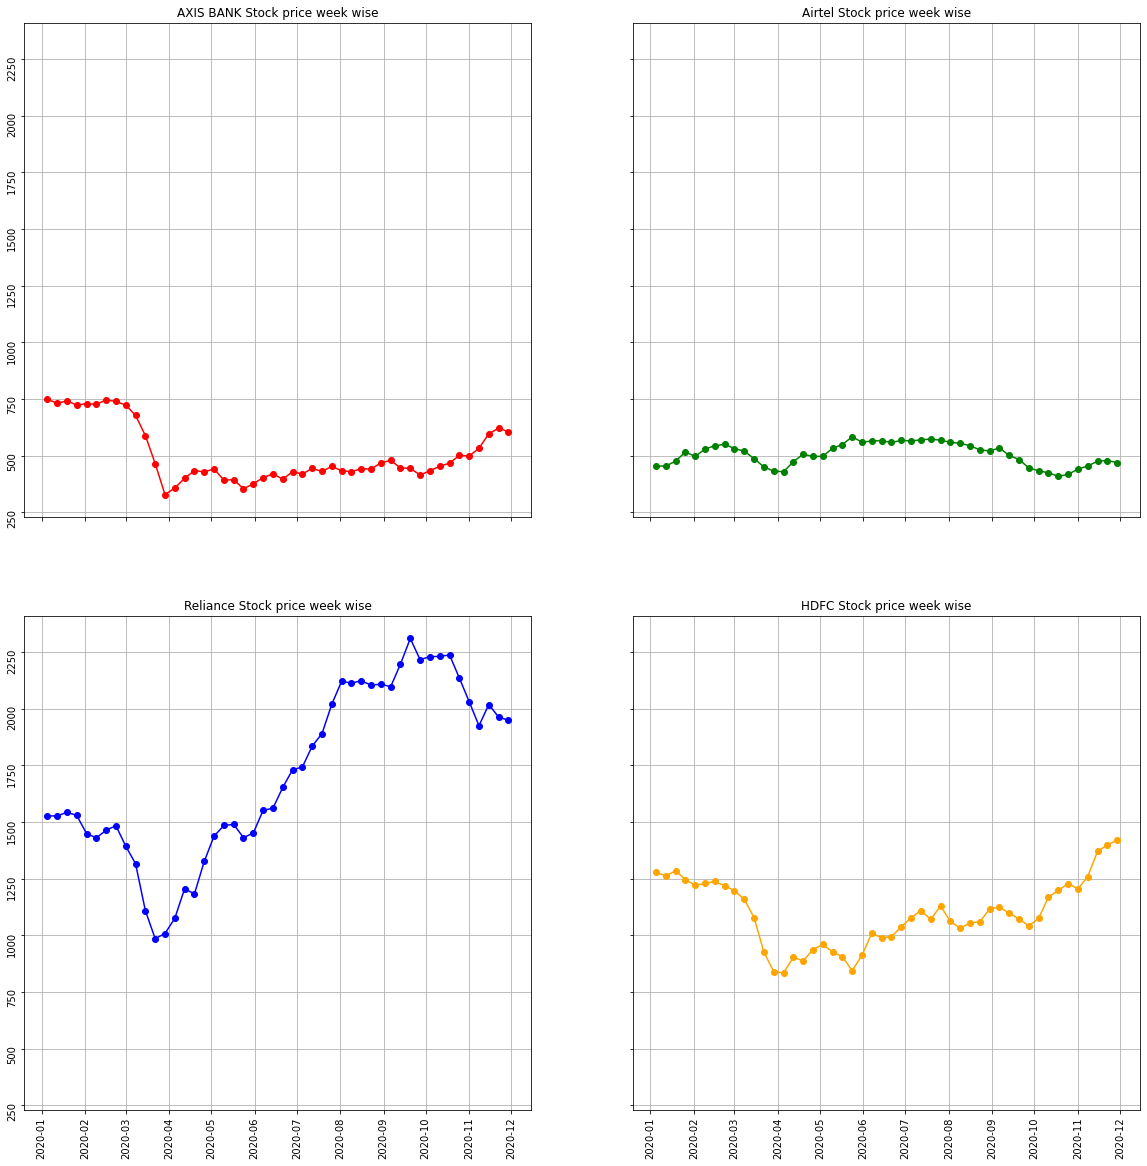

In [50]:
weekly_axi_20 = axi_20.resample('W').mean()
weekly_airtel_20 = airtel_20.resample('W').mean()
weekly_reliance_20 = reliance_20.resample('W').mean()
weekly_hdfc_20 = hdfc_20.resample('W').mean()
f, ax = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)
ax[0,0].plot(weekly_axi_20.index,weekly_axi_20['Close'], '-o', color='red')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('AXIS BANK Stock price week wise');

ax[0,1].plot(weekly_airtel_20.index, weekly_airtel_20['Close'], '-o',color='green')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Airtel Stock price week wise');

ax[1,0].plot(weekly_reliance_20.index, weekly_reliance_20['Close'],'-o', color='blue')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Reliance Stock price week wise');

ax[1,1].plot(weekly_hdfc_20.index, weekly_hdfc_20['Close'], '-o', color='orange')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('HDFC Stock price week wise');

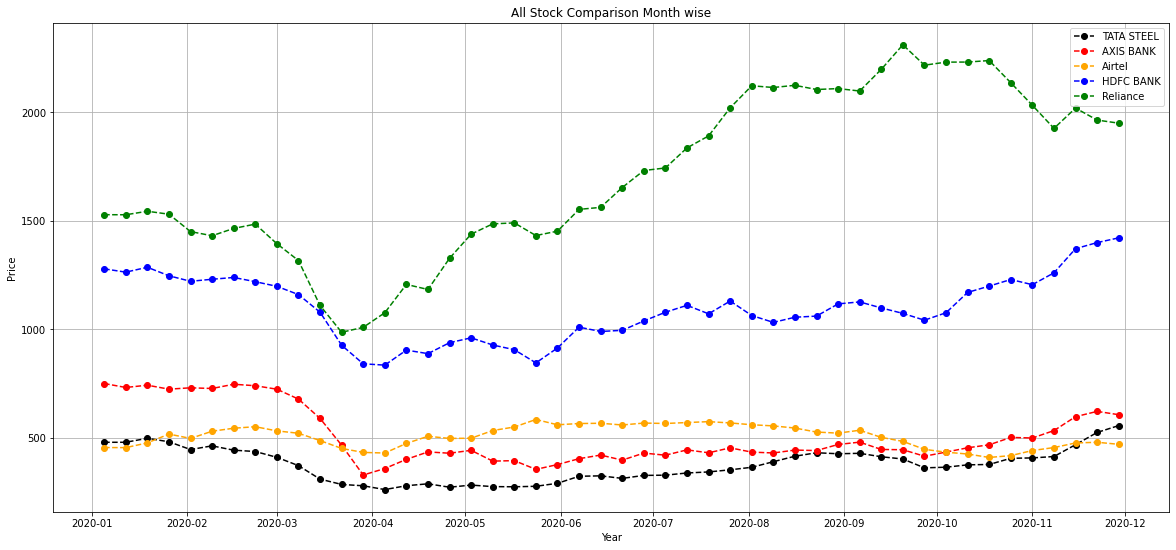

In [51]:
plt.figure(figsize=(20,9))
plt.plot(weekly_tatas_20.index,weekly_tatas_20['Close'],'--', color='black',label='TATA STEEL',marker='o')
plt.plot(weekly_axi_20.index, weekly_axi_20['Close'], '--', color='red',label='AXIS BANK',marker='o')
plt.plot(weekly_airtel_20.index,weekly_airtel_20['Close'], '--' ,color='orange',label='Airtel',marker='o')
plt.plot(weekly_hdfc_20.index, weekly_hdfc_20['Close'], '--' ,color='blue',label='HDFC BANK',marker='o')
plt.plot(weekly_reliance_20.index, weekly_reliance_20['Close'], '--' ,color='green',label='Reliance',marker='o')
plt.grid(True)
plt.title('All Stock Comparison Month wise')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Analysing Difference between open/Close price of stock(Resampling Weekly(2020))

In [52]:
#calculating Difference between opening and closing price of TATA STEEL stock
tatas['diff'] = tatas['Open'] - tatas['Close']
tatas_diff = tatas.resample('W').mean()
tatas_diff.tail(10)

Prev Close      Open      High       Low        Last     Close  \
Date                                                                         
2020-09-27     369.650  370.3600  373.7100  354.5200  360.390000  360.9700   
2020-10-04     360.725  365.0750  369.6375  359.6250  363.587500  363.9375   
2020-10-11     373.880  376.6800  384.4000  370.2700  375.290000  374.7900   
2020-10-18     371.680  374.8000  383.0300  369.0800  376.060000  376.5500   
2020-10-25     399.090  400.1600  408.9800  397.6100  405.180000  405.0100   
2020-11-01     409.310  409.1300  415.2600  399.7000  405.720000  406.7300   
2020-11-08     409.940  412.5800  420.1800  407.2700  412.110000  413.1300   
2020-11-15     456.725  459.0500  473.0500  453.4750  467.191667  467.6750   
2020-11-22     513.925  515.4625  533.0375  510.8375  523.312500  524.1000   
2020-11-29     546.790  550.5900  561.7100  544.3100  555.040000  555.6800   

                VWAP        Volume      Turnover    diff  
Date                                                      
2020-09-27  363.3420  1.557496e+07  5.678352e+14  9.3900  
2020-10-04  364.3125  1.317028e+07  4.799970e+14  1.1375  
2020-10-11  377.7240  1.593778e+07  6.027708e+14  1.8900  
2020-10-18  376.1800  2.061163e+07  7.803144e+14 -1.7500  
2020-10-25  403.8840  2.030178e+07  8.254920e+14 -4.8500  
2020-11-01  407.6040  1.630363e+07  6.648376e+14  2.4000  
2020-11-08  413.5960  1.658629e+07  6.891018e+14 -0.5500  
2020-11-15  463.6000  2.227370e+07  1.026622e+15 -8.6250  
2020-11-22  524.6900  3.214753e+07  1.686116e+15 -8.6375  
2020-11-29  553.7240  2.331939e+07  1.304821e+15 -5.0900

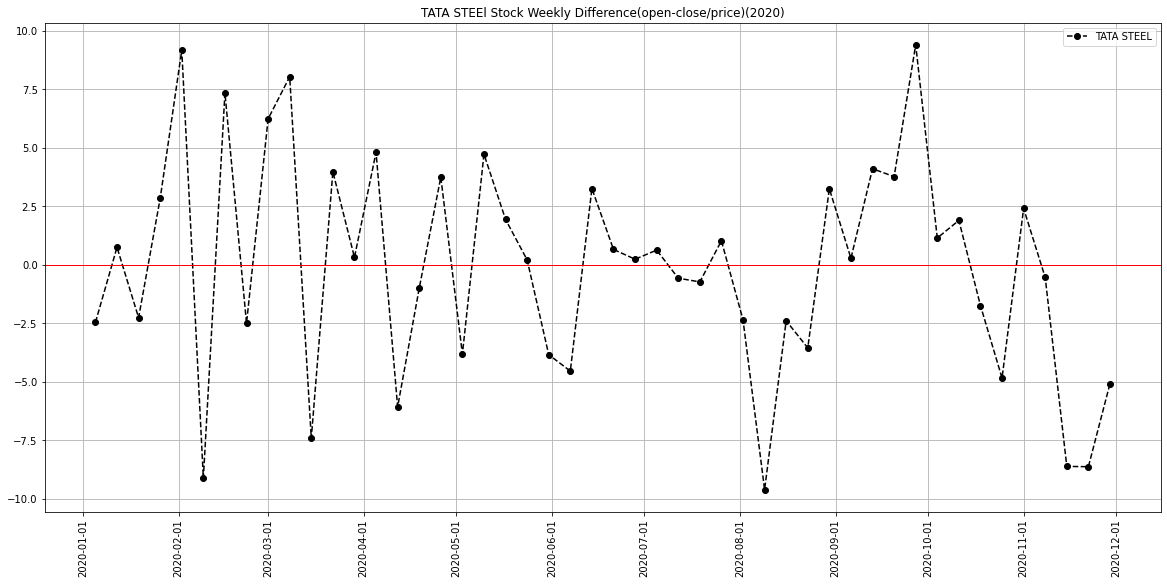

In [53]:
plt.figure(figsize=(20,9))
plt.plot(tatas_diff.loc['2020-01-01':'2020-11-29'].index, tatas_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',color='black',label='TATA STEEL',marker='o')
plt.axhline(0, color='red', lw=1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(True)
plt.title('TATA STEEl Stock Weekly Difference(open-close/price)(2020)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

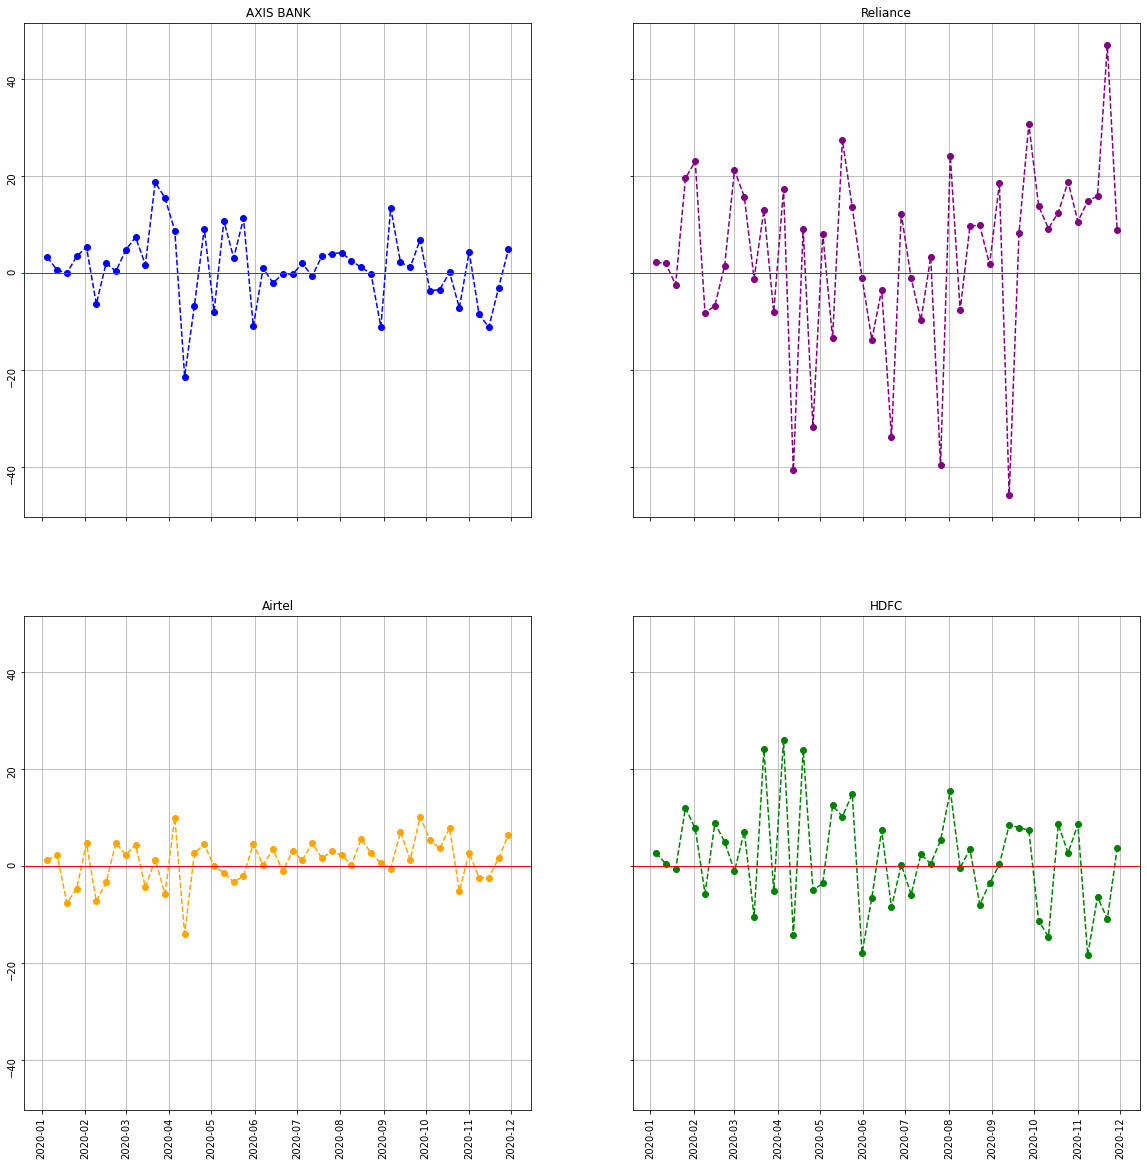

In [54]:
axi['diff'] = axi['Open'] - axi['Close']
axi_diff = axi.resample('W').mean()

reliance['diff'] = reliance['Open'] - reliance['Close']
reliance_diff = reliance.resample('W').mean()

airtel['diff'] = airtel['Open'] - airtel['Close']
airtel_diff = airtel.resample('W').mean()

hdfc['diff'] = hdfc['Open'] - hdfc['Close']
hdfc_diff = hdfc.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)

ax[0,0].plot(axi_diff.loc['2020-01-01':'2020-11-29'].index, axi_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',color='Blue',label='Axis Bank',marker='o')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].axhline(0, color='red', lw=1)
ax[0,0].set_title('AXIS BANK');

ax[0,1].plot(reliance_diff.loc['2020-01-01':'2020-11-29'].index, reliance_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',color='purple',label='Reliance',marker='o')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].axhline(0, color='red', lw=1)
ax[0,1].set_title('Reliance');

ax[1,0].plot(airtel_diff.loc['2020-01-01':'2020-11-29'].index, airtel_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',color='Orange',label='Airtel',marker='o')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].axhline(0, color='red', lw=1)
ax[1,0].set_title('Airtel');

ax[1,1].plot(hdfc_diff.loc['2020-01-01':'2020-11-29'].index, hdfc_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',color='green',label='Hdfc',marker='o')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].axhline(0, color='red', lw=1)
ax[1,1].set_title('HDFC');

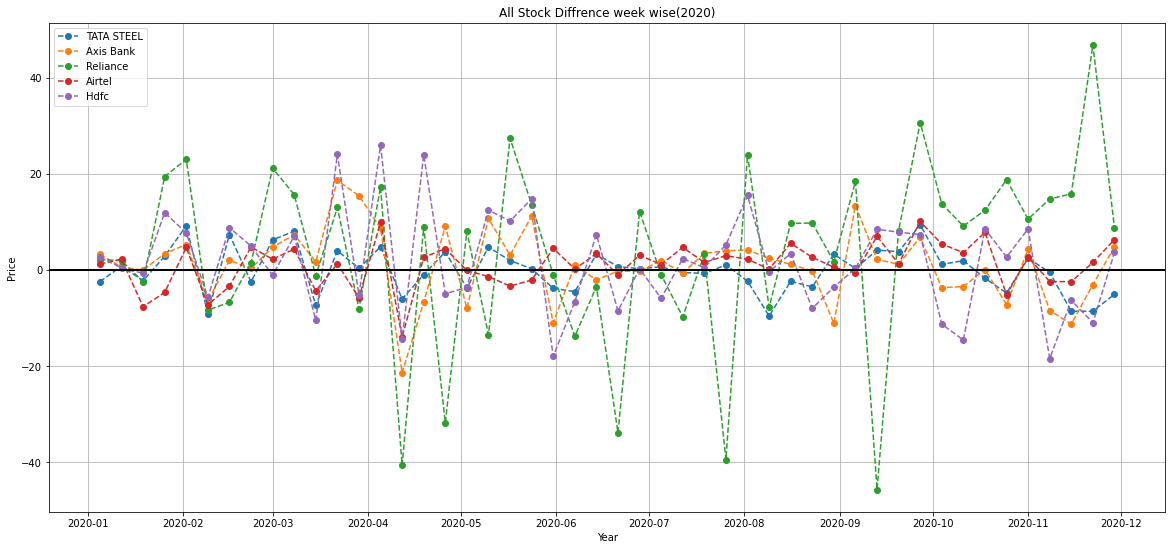

In [55]:
plt.figure(figsize=(20,9))
plt.plot(tatas_diff.loc['2020-01-01':'2020-11-29'].index, tatas_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',label='TATA STEEL',marker='o')
plt.plot(axi_diff.loc['2020-01-01':'2020-11-29'].index, axi_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',label='Axis Bank',marker='o')
plt.plot(reliance_diff.loc['2020-01-01':'2020-11-29'].index, reliance_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',label='Reliance',marker='o')
plt.plot(airtel_diff.loc['2020-01-01':'2020-11-29'].index, airtel_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',label='Airtel',marker='o')
plt.plot(hdfc_diff.loc['2020-01-01':'2020-11-29'].index, hdfc_diff.loc['2020-01-01':'2020-11-29']['diff'],'--',label='Hdfc',marker='o')
plt.grid(True)
plt.axhline(0, color='Black', lw=2)
plt.title('All Stock Diffrence week wise(2020)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Calculating Daily Return Of  The Stock On Average

In [56]:
tatas_temp = tatas.copy()
tatas_temp['Return']= tatas['Close'].pct_change()
tatas_temp['Return'].fillna(0, inplace=True)


axi_temp = axi.copy()
axi_temp['Return']= axi['Close'].pct_change()
axi_temp['Return'].fillna(0, inplace=True)

reliance_temp = reliance.copy()
reliance_temp['Return']= reliance['Close'].pct_change()
reliance_temp['Return'].fillna(0, inplace=True)

hdfc_temp = hdfc.copy()
hdfc_temp['Return']= hdfc['Close'].pct_change()
hdfc_temp['Return'].fillna(0, inplace=True)

airtel_temp = airtel.copy()
airtel_temp['Return']= hdfc['Close'].pct_change()
airtel_temp['Return'].fillna(0, inplace=True)

airtel_temp.head()

Symbol Series  Prev Close   Open   High    Low   Last  Close  \
Date                                                                           
2002-02-18  BHARTIARTL     EQ        0.00  51.90  51.90  43.50  44.70  44.35   
2002-02-19  BHARTIARTL     EQ       44.35  45.15  45.15  41.30  41.35  41.70   
2002-02-20  BHARTIARTL     EQ       41.70  40.60  42.80  40.25  41.20  41.25   
2002-02-21  BHARTIARTL     EQ       41.25  42.85  43.40  42.15  42.20  42.40   
2002-02-22  BHARTIARTL     EQ       42.40  42.65  43.60  41.10  43.35  43.30   

             VWAP    Volume      Turnover  diff    Return  
Date                                                       
2002-02-18  46.00  10381190  4.775430e+13  7.55  0.063798  
2002-02-19  42.58   3552660  1.512610e+13  3.45 -0.053331  
2002-02-20  41.56   2512964  1.044350e+13 -0.65  0.004677  
2002-02-21  42.76   1338196  5.722680e+12  0.45  0.001481  
2002-02-22  42.75    811327  3.468410e+12 -0.65  0.043313

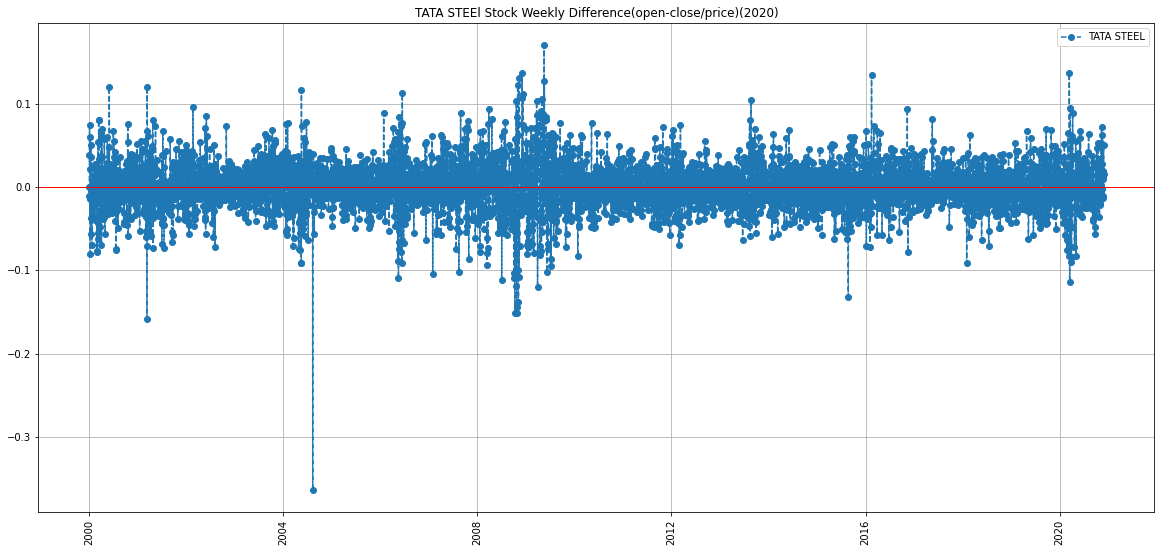

In [57]:
plt.figure(figsize=(20,9))
plt.plot(tatas_temp['Return'],'--',label='TATA STEEL',marker='o')
plt.axhline(0, color='red', lw=1)

plt.grid(True)
plt.title('TATA STEEl Stock Weekly Difference(open-close/price)(2020)')
plt.xticks(rotation=90)
plt.legend()
plt.show()




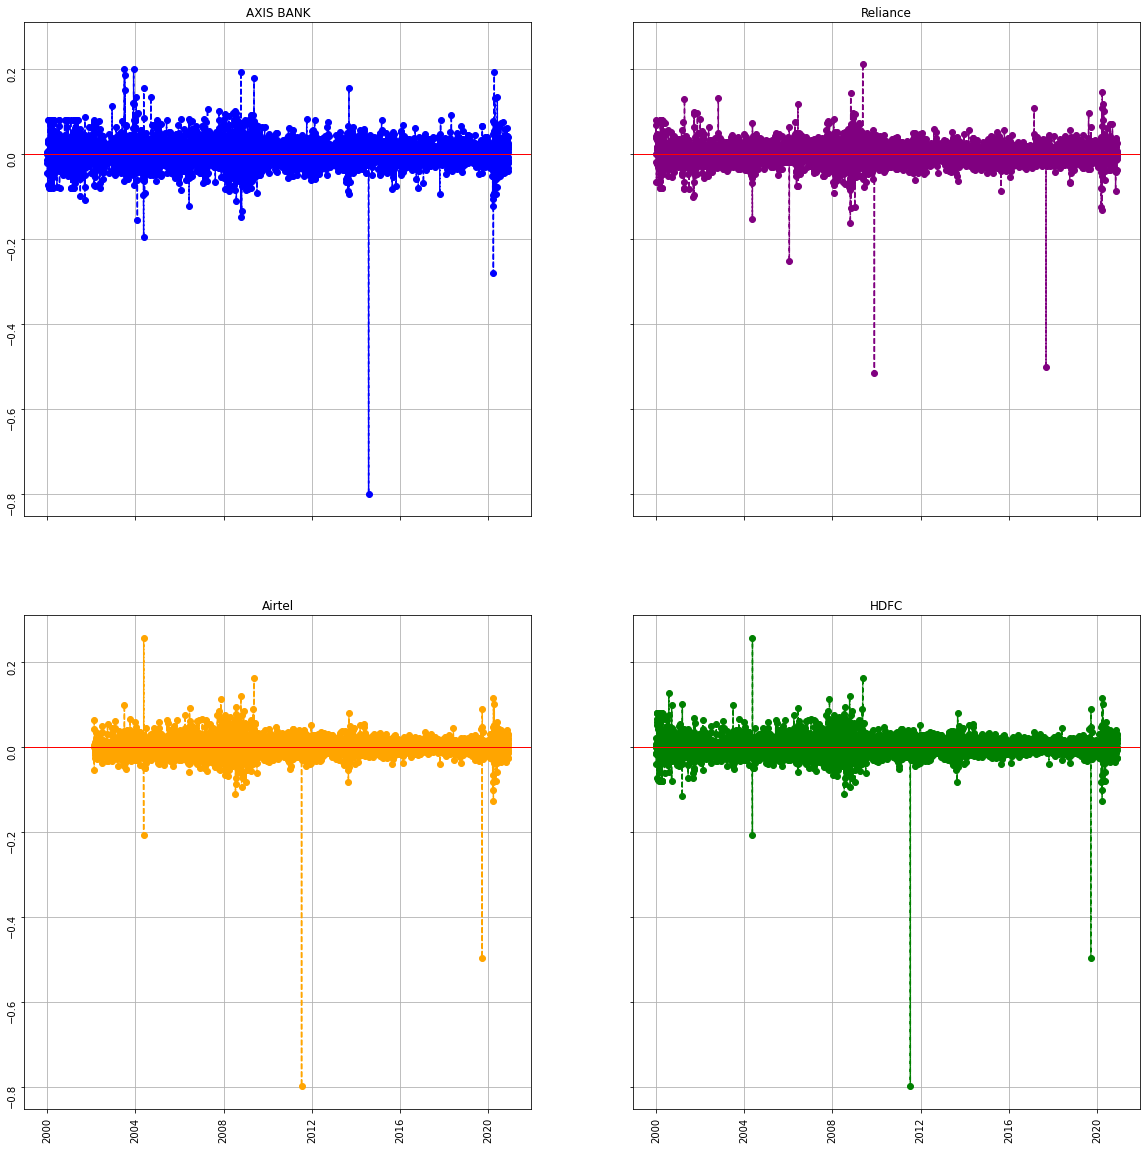

In [58]:
f, ax = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)

ax[0,0].plot(axi_temp['Return'],'--',color='Blue',label='Axis Bank',marker='o')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].axhline(0, color='red', lw=1)
ax[0,0].set_title('AXIS BANK');

ax[0,1].plot(reliance_temp['Return'],'--',color='purple',label='Reliance',marker='o')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].axhline(0, color='red', lw=1)
ax[0,1].set_title('Reliance');

ax[1,0].plot(airtel_temp['Return'],'--',color='Orange',label='Airtel',marker='o')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].axhline(0, color='red', lw=1)
ax[1,0].set_title('Airtel');

ax[1,1].plot(hdfc_temp['Return'],'--',color='green',label='Hdfc',marker='o')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].axhline(0, color='red', lw=1)
ax[1,1].set_title('HDFC');

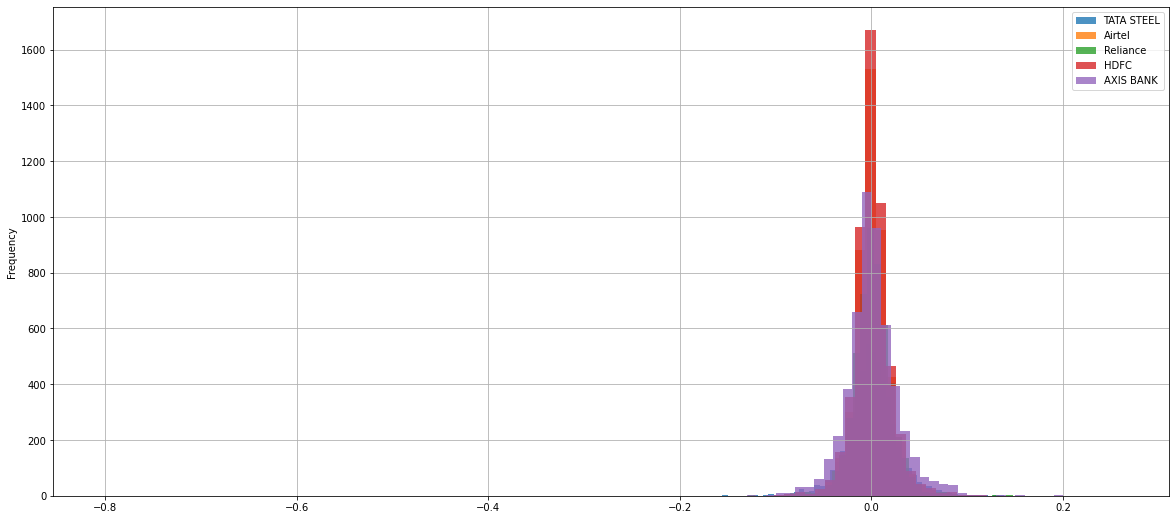

In [59]:
tatas_temp['Return'].plot.hist(bins=100, figsize=(20,9), grid=True, label="TATA STEEL", alpha=0.8)
airtel_temp['Return'].plot.hist(bins=100, figsize=(20,9), grid=True, label="Airtel", alpha=0.8)
reliance_temp['Return'].plot.hist(bins=100, figsize=(20,9), grid=True, label="Reliance", alpha=0.8)
hdfc_temp['Return'].plot.hist(bins=100, figsize=(20,9), grid=True, label="HDFC", alpha=0.8)
axi_temp['Return'].plot.hist(bins=100, figsize=(20,9), grid=True, label="AXIS BANK", alpha=0.8)
plt.legend()
plt.show()

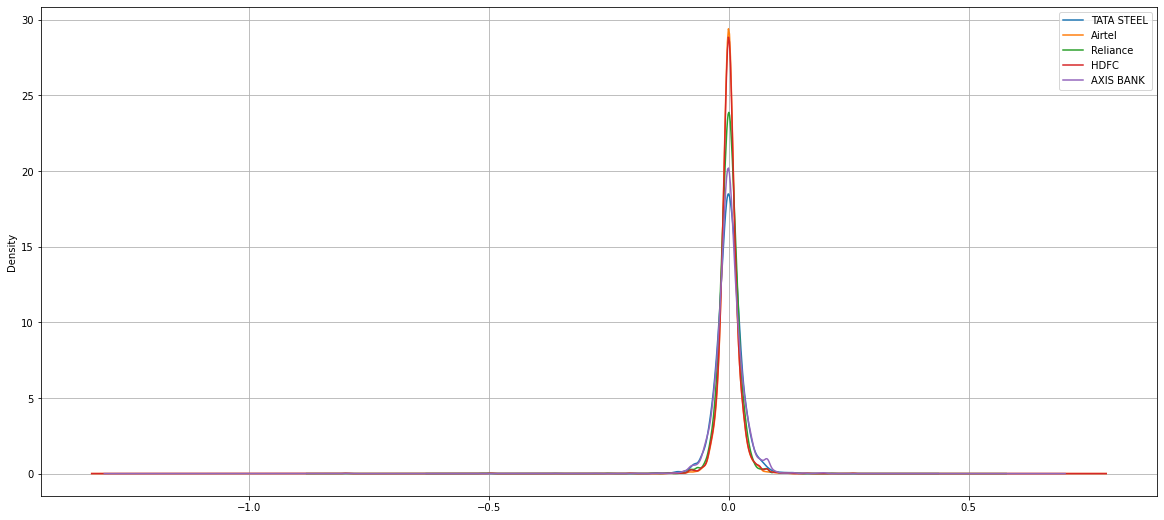

In [60]:
plt.figure(figsize=(20,9))
tatas_temp['Return'].plot.kde(label='TATA STEEL');
airtel_temp['Return'].plot.kde( label="Airtel")
reliance_temp['Return'].plot.kde(label="Reliance")
hdfc_temp['Return'].plot.kde(label="HDFC")
axi_temp['Return'].plot.kde(label="AXIS BANK")
plt.grid(True)
plt.legend()
plt.show()

### box plots comparing the returns

<AxesSubplot:>

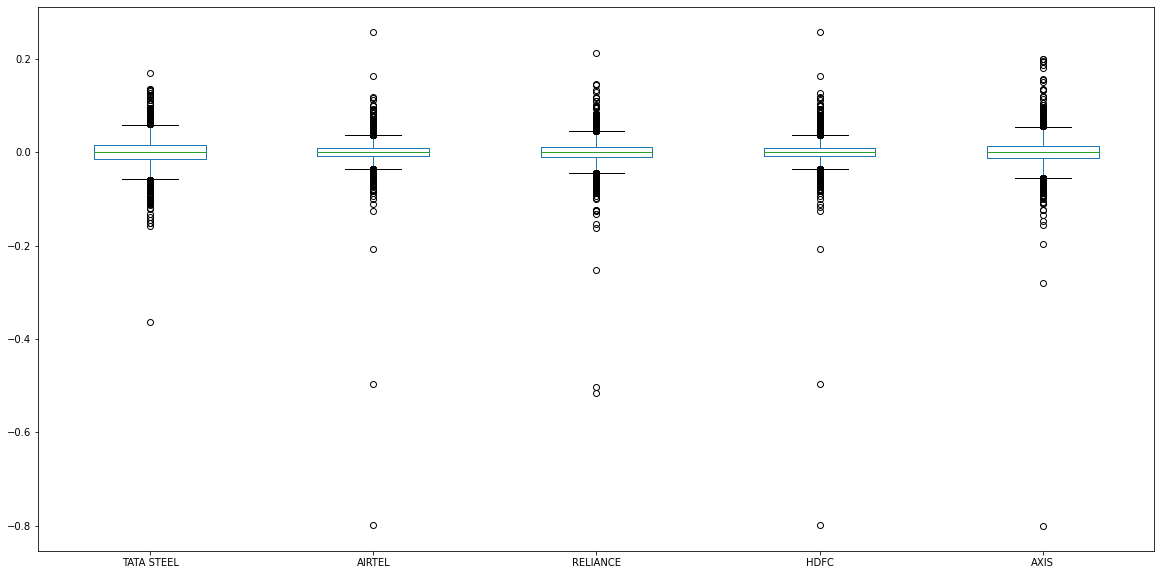

In [61]:
conc1 = pd.concat([tatas_temp['Return'],airtel_temp['Return'],reliance_temp['Return'],hdfc_temp['Return'],axi_temp['Return']], axis=1)
conc1.columns = ['TATA STEEL', 'AIRTEL', 'RELIANCE','HDFC','AXIS']
conc1.plot(kind='box', figsize=(20,10))


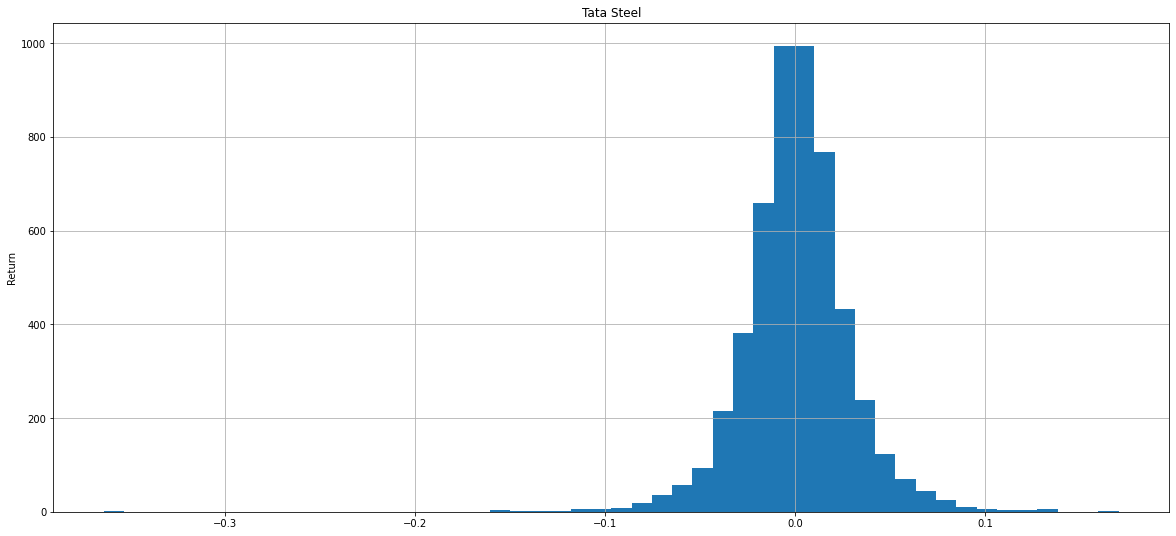

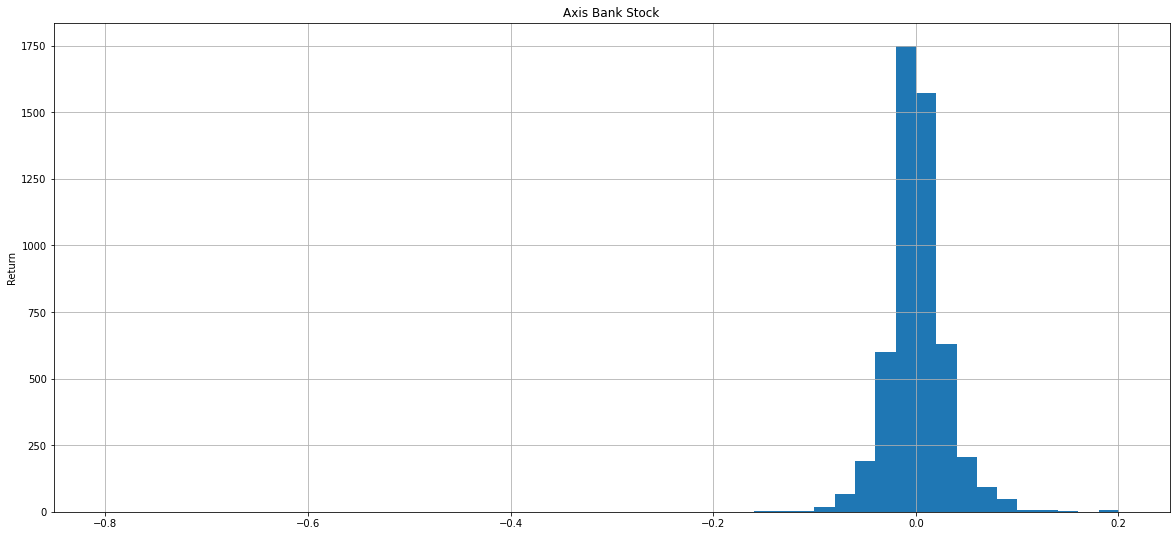

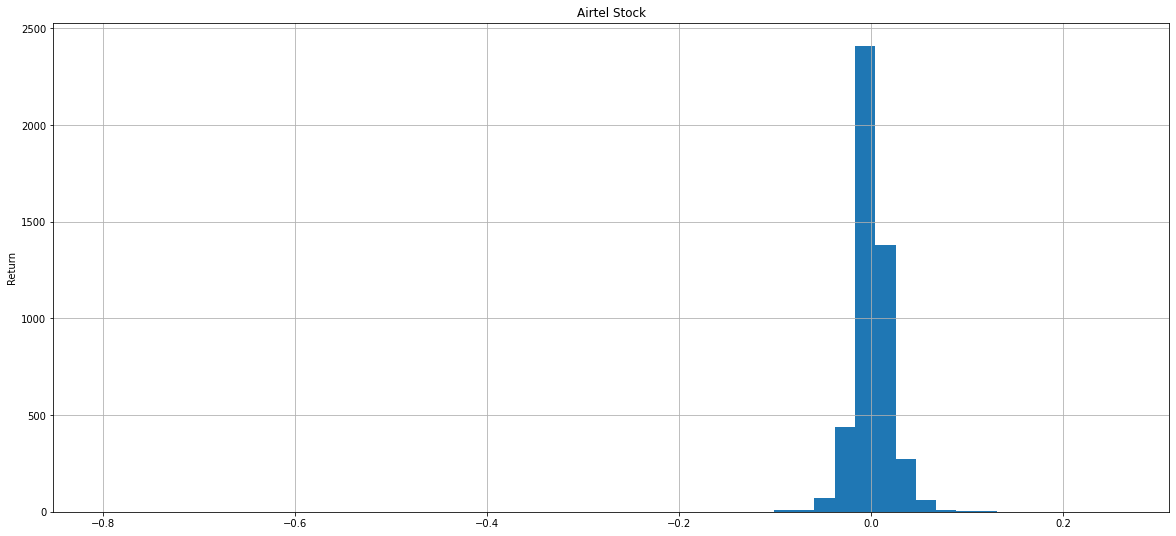

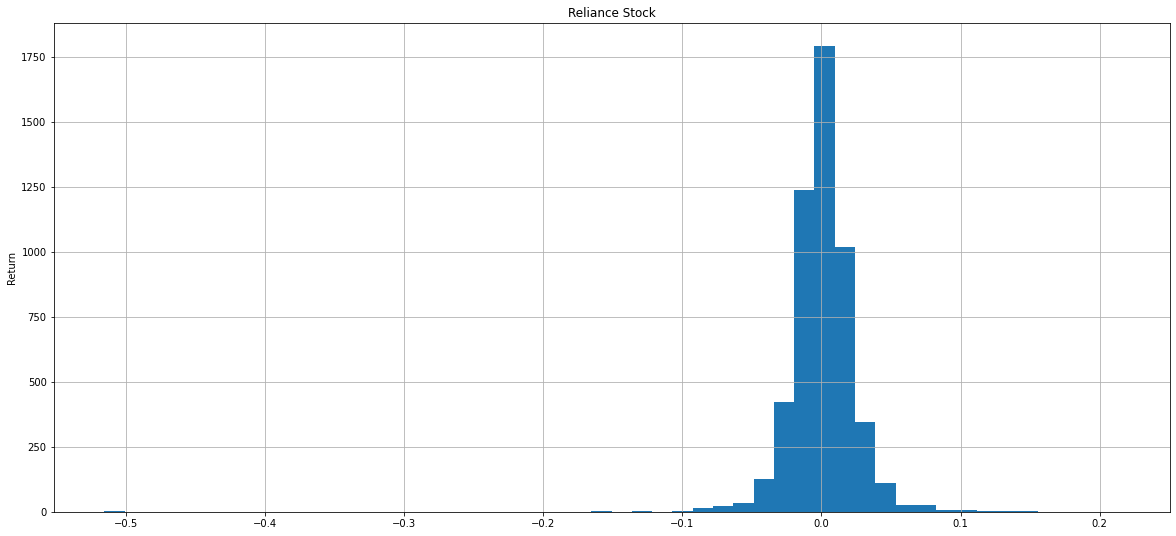

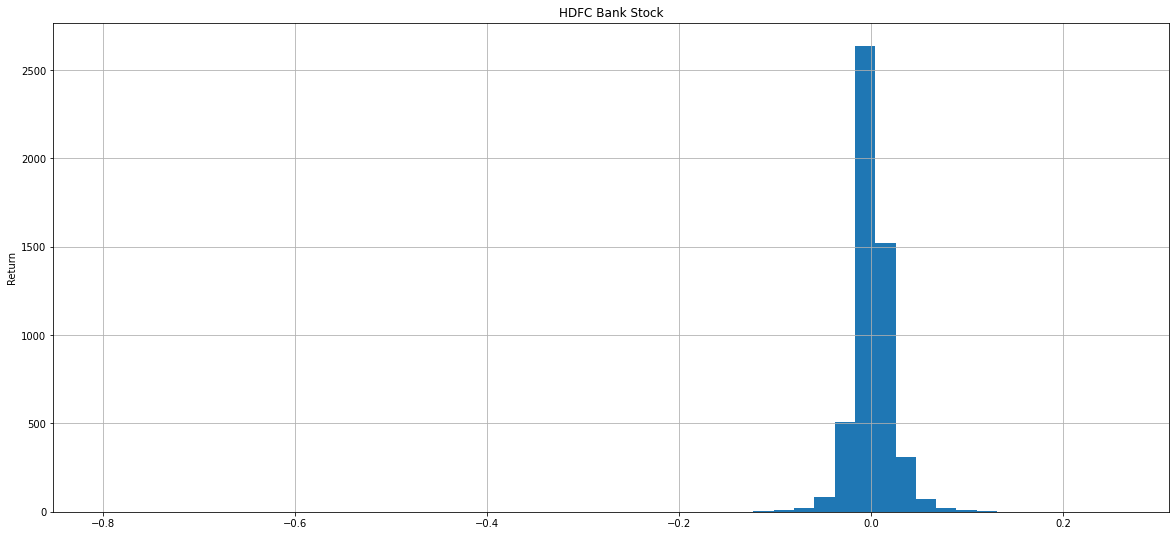

In [62]:
tatas_temp['Return'].hist(bins=50, figsize=(20,9))
plt.title("Tata Steel")
plt.ylabel("Return")
plt.show()
axi_temp['Return'].hist(bins=50, figsize=(20,9))
plt.title("Axis Bank Stock")
plt.ylabel("Return")
plt.show()
airtel_temp['Return'].hist(bins=50, figsize=(20,9))
plt.title("Airtel Stock")
plt.ylabel("Return")
plt.show()
reliance_temp['Return'].hist(bins=50, figsize=(20,9))
plt.title("Reliance Stock")
plt.ylabel("Return")
plt.show()
hdfc_temp['Return'].hist(bins=50, figsize=(20,9))
plt.title("HDFC Bank Stock")
plt.ylabel("Return")
plt.show()


Text(0.5, 1.0, 'HDFC BANK DAILY RETURN ')

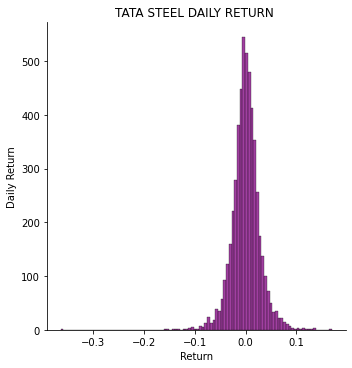

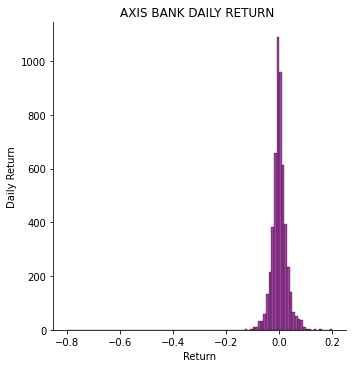

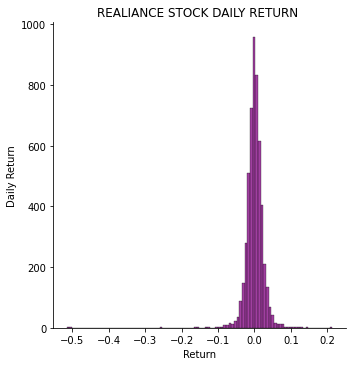

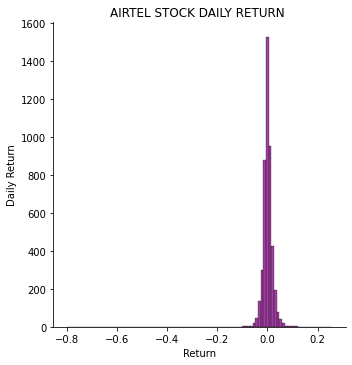

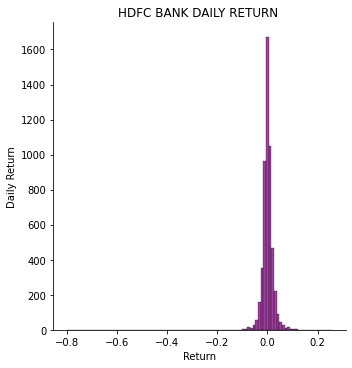

In [63]:
sns.displot(tatas_temp['Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('TATA STEEL DAILY RETURN ')

sns.displot(axi_temp['Return'].dropna(), bins=100, color='purple'),ax[0,0].grid(True)
plt.ylabel('Daily Return')
plt.title('AXIS BANK DAILY RETURN ')

sns.displot(reliance_temp['Return'].dropna(), bins=100, color='purple'),ax[0,1].grid(True)
plt.ylabel('Daily Return')
plt.title('REALIANCE STOCK DAILY RETURN ')

sns.displot(airtel_temp['Return'].dropna(), bins=100, color='purple'),ax[1,0].grid(True)
plt.ylabel('Daily Return')
plt.title('AIRTEL STOCK DAILY RETURN ')

sns.displot(hdfc_temp['Return'].dropna(), bins=100, color='purple'),ax[1,1].grid(True)
plt.ylabel('Daily Return')
plt.title('HDFC BANK DAILY RETURN ')

### correlation between different stocks closing prices

In [64]:
closing_df= pd.DataFrame({'TATA STEEL':tatas['Close'], 'HDFC':hdfc['Close'],'AXIS':axi['Close'],'RELIANCE': reliance['Close'],
                         'AIRTEL': airtel['Close']})
closing_df.tail()

TATA STEEL     HDFC    AXIS  RELIANCE  AIRTEL
Date                                                     
2020-11-23      543.10  1394.60  595.60   1950.70  477.25
2020-11-24      548.30  1438.20  619.65   1964.05  474.25
2020-11-25      541.25  1402.80  599.85   1947.80  464.10
2020-11-26      568.40  1426.65  612.55   1952.60  468.40
2020-11-27      577.35  1440.85  601.60   1929.80  463.25

In [65]:
close_ret = closing_df.pct_change()
close_ret.head()

TATA STEEL      HDFC      AXIS  RELIANCE  AIRTEL
Date                                                        
2000-01-03         NaN       NaN       NaN       NaN     NaN
2000-01-04   -0.010823  0.022353  0.005618  0.080056     NaN
2000-01-05    0.038130 -0.039413 -0.020484  0.039176     NaN
2000-01-06    0.074737  0.008086 -0.013308  0.041947     NaN
2000-01-07    0.021991  0.000297 -0.044316  0.068626     NaN

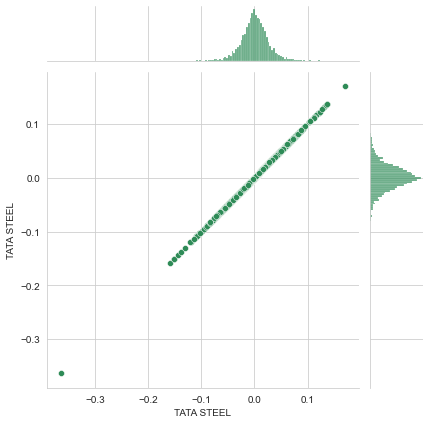

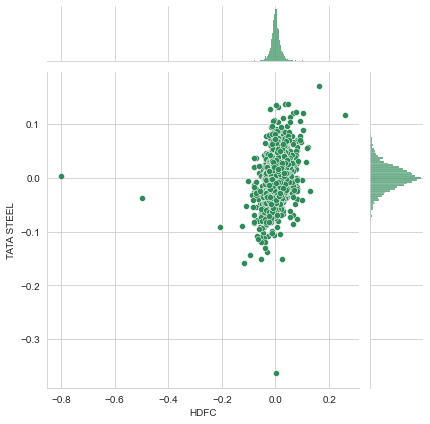

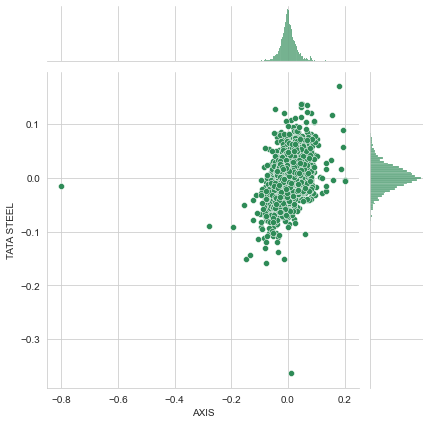

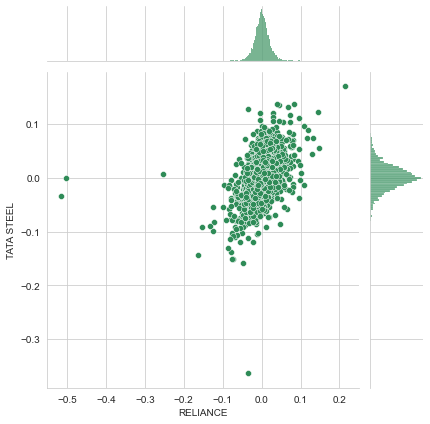

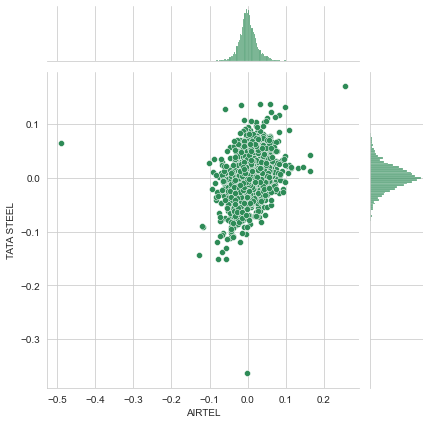

In [66]:
sns.set_style('whitegrid')
stock_name = ["TATA STEEL","HDFC","AXIS","RELIANCE","AIRTEL"]
sns.color_palette("pastel")
j=0
for i in stock_name:
    sns.jointplot(data=close_ret, x =i,y ="TATA STEEL",kind='scatter',color="seagreen")
        
        
    
   


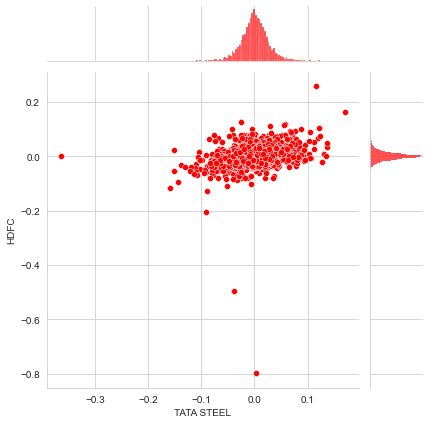

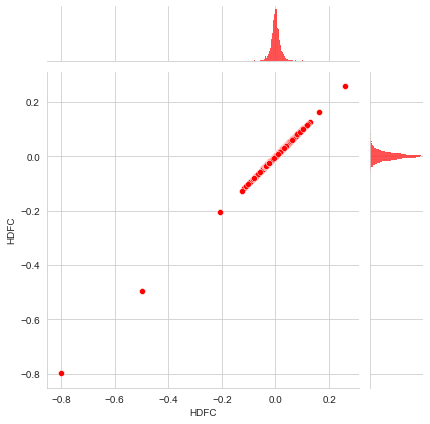

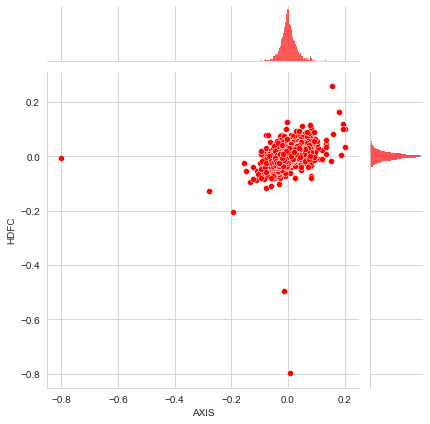

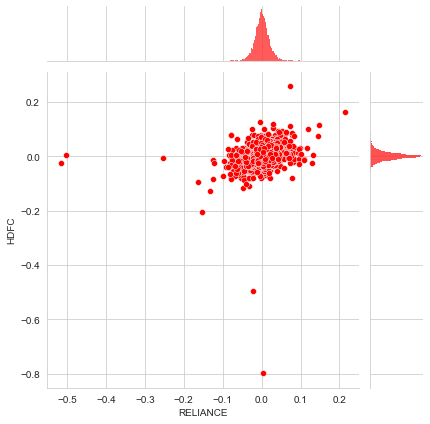

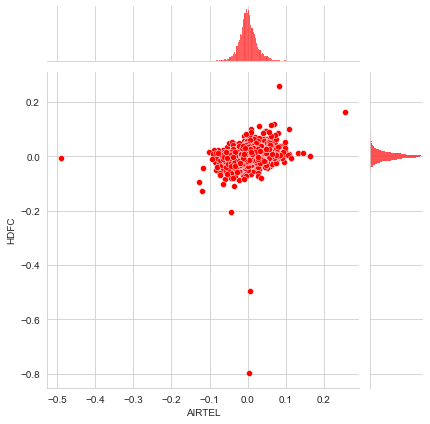

In [67]:
sns.set_style('whitegrid')
stock_name = ["TATA STEEL","HDFC","AXIS","RELIANCE","AIRTEL"]
sns.color_palette("pastel")
j=0
for i in stock_name:
    sns.jointplot(data=close_ret, x =i,y ="HDFC",kind='scatter',color="red")
        

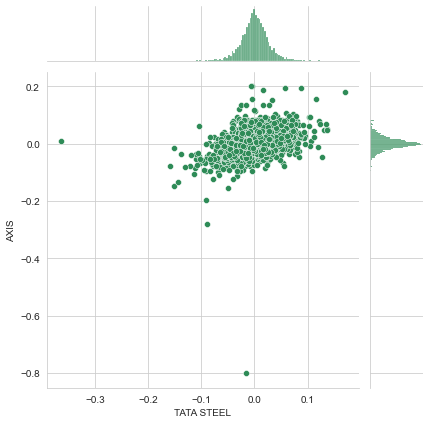

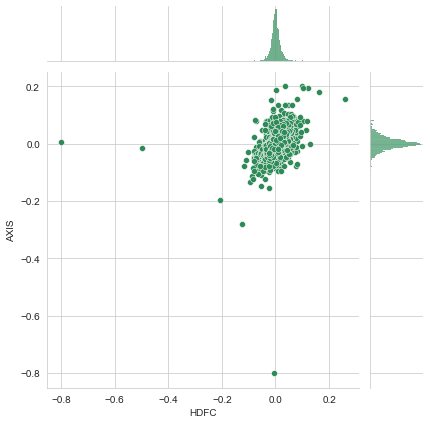

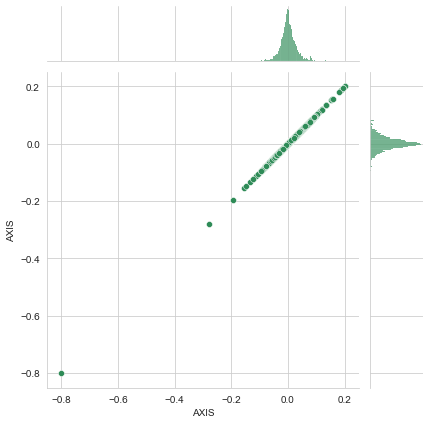

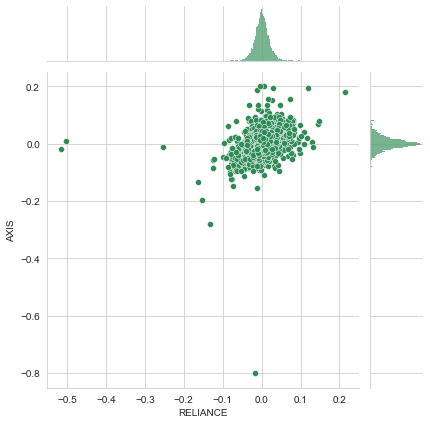

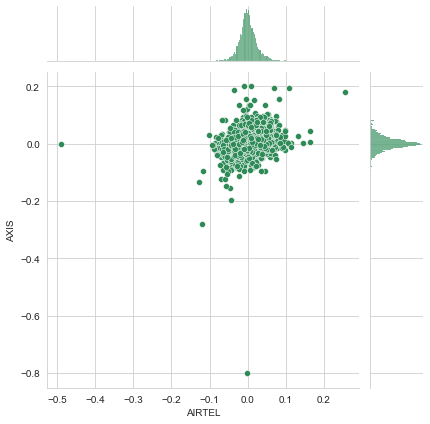

In [68]:
sns.set_style('whitegrid')
stock_name = ["TATA STEEL","HDFC","AXIS","RELIANCE","AIRTEL"]
sns.color_palette("pastel")
j=0
for i in stock_name:
    sns.jointplot(data=close_ret, x =i,y ="AXIS",kind='scatter',color="seagreen")
        

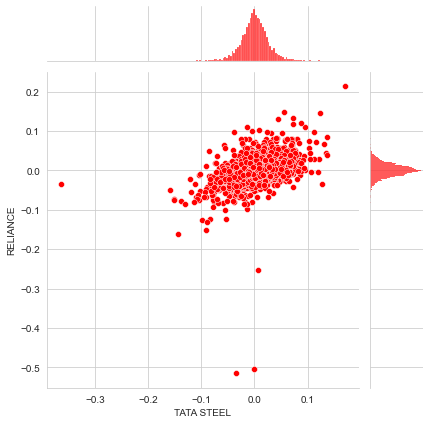

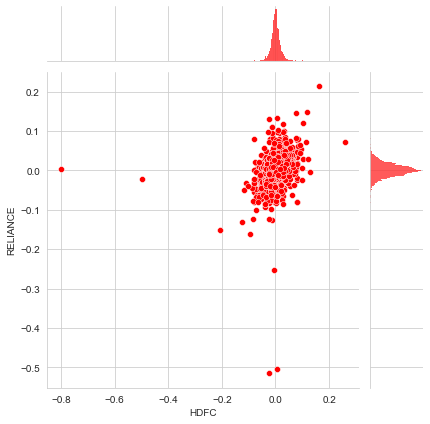

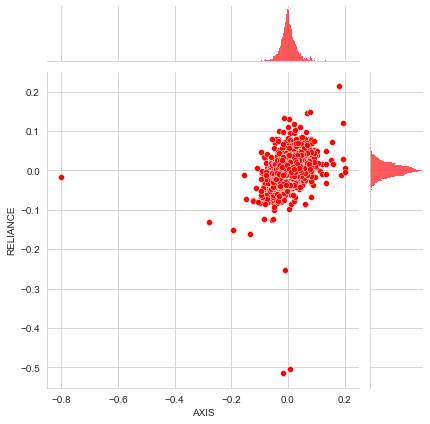

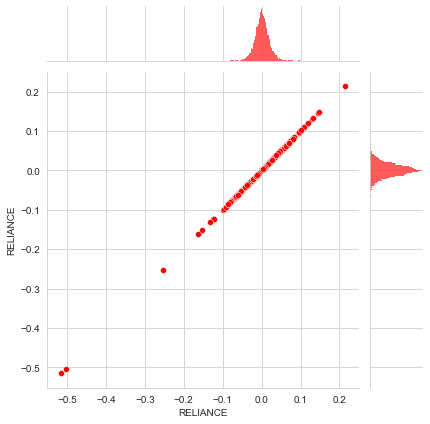

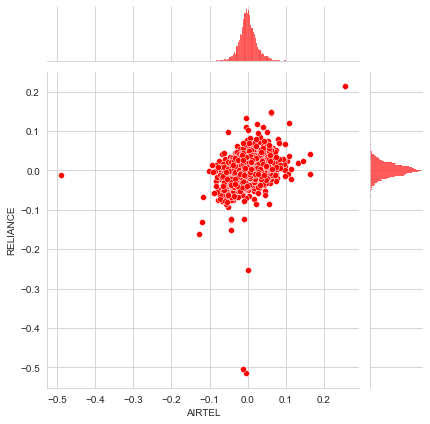

In [69]:
sns.set_style('whitegrid')
stock_name = ["TATA STEEL","HDFC","AXIS","RELIANCE","AIRTEL"]
sns.color_palette("pastel")
j=0
for i in stock_name:
    sns.jointplot(data=close_ret, x =i,y ="RELIANCE",kind='scatter',color="red")
        

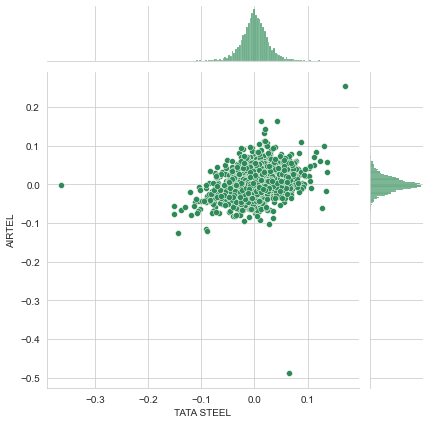

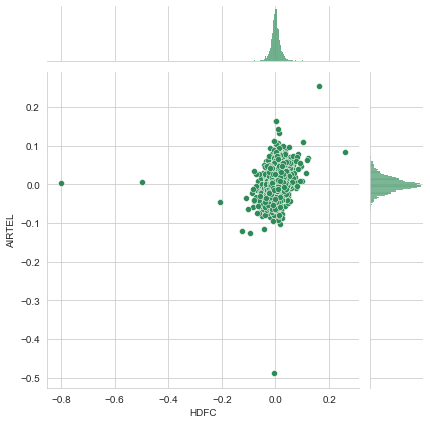

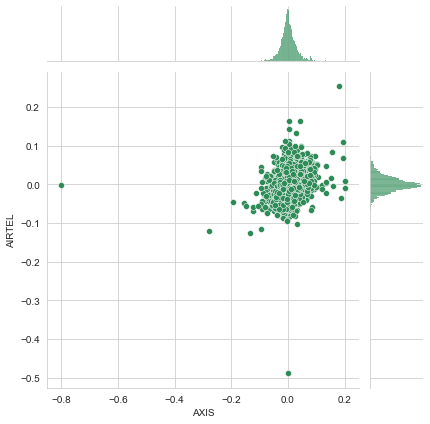

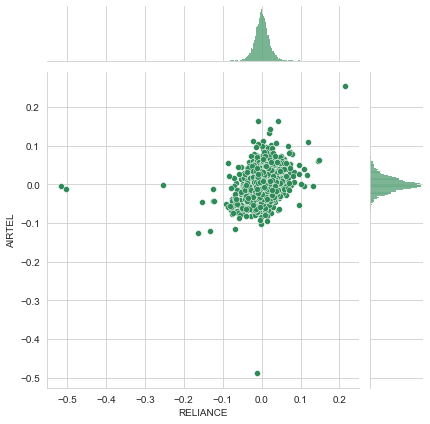

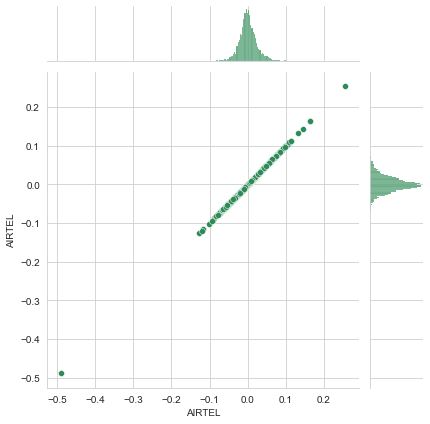

In [70]:
# sns.set_style('whitegrid')
stock_name = ["TATA STEEL","HDFC","AXIS","RELIANCE","AIRTEL"]
sns.color_palette("pastel")
j=0
for i in stock_name:
    sns.jointplot(data=close_ret, x =i,y ="AIRTEL",kind='scatter',color="seagreen")
        

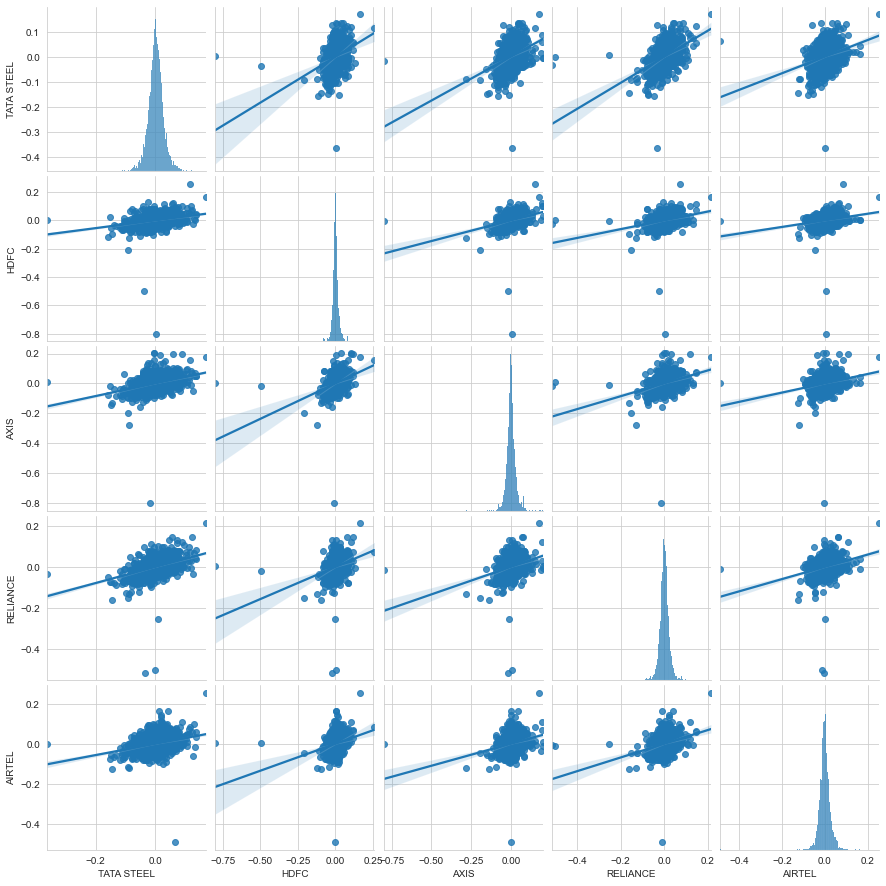

In [71]:
sns.pairplot(close_ret, kind='reg')

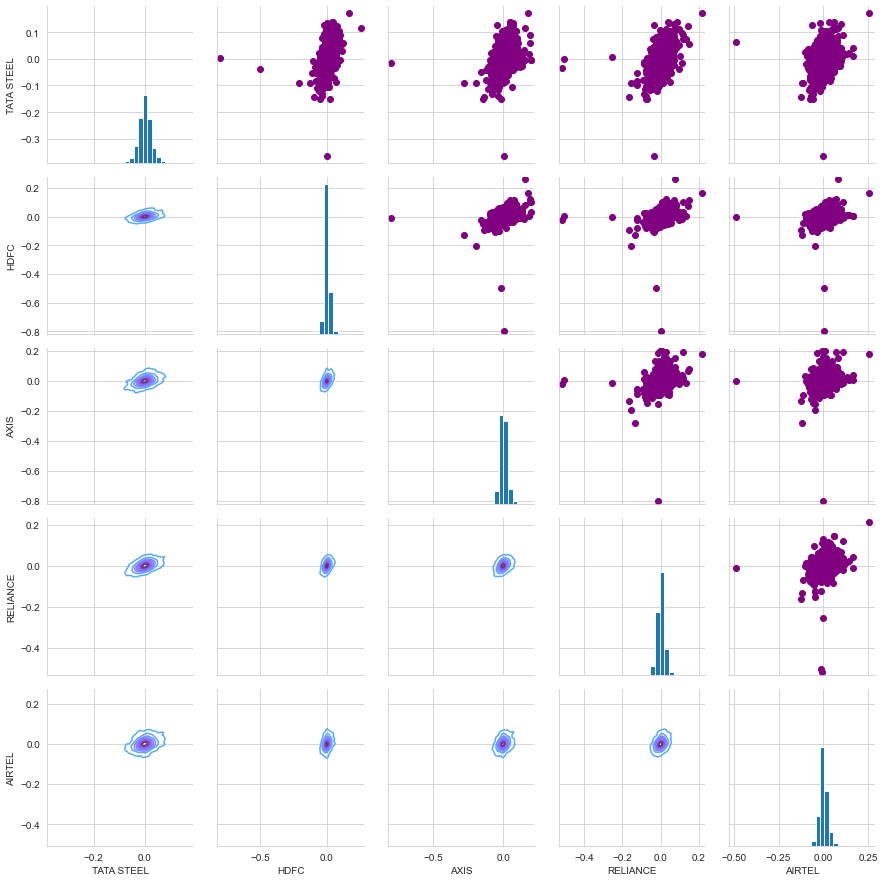

In [72]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(close_ret.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

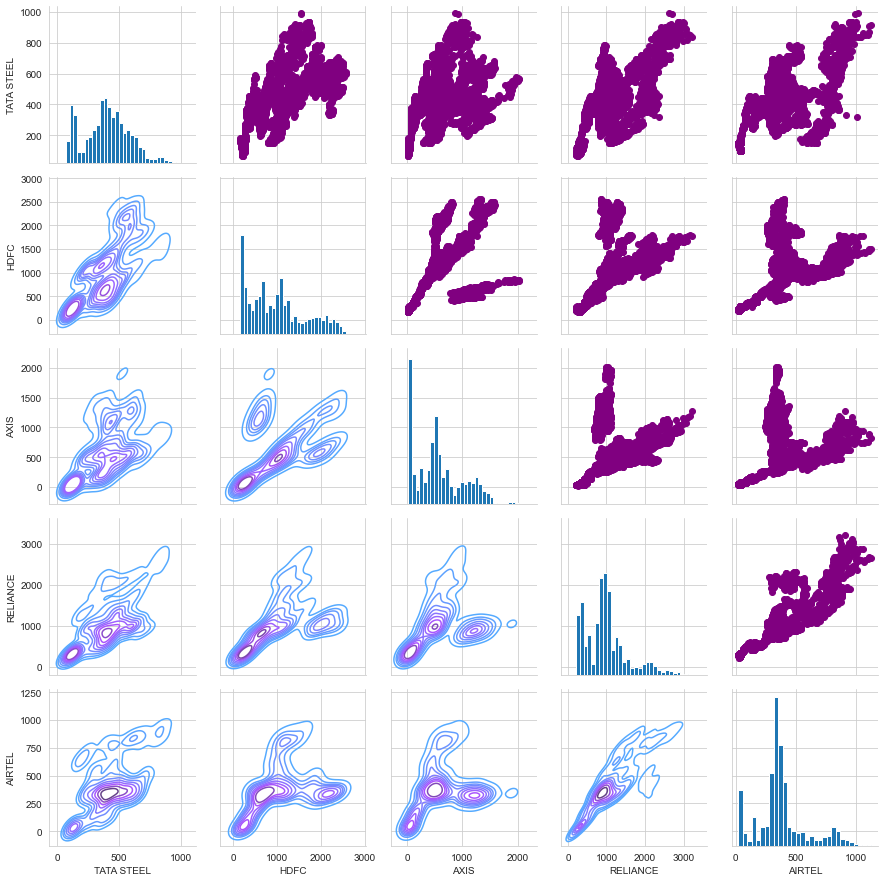

In [73]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

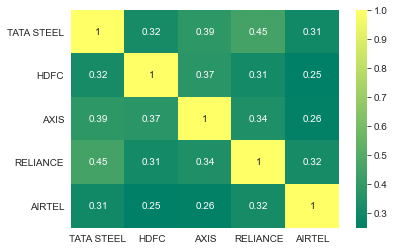

In [74]:
sns.heatmap(close_ret.corr(), annot=True, cmap='summer')

<AxesSubplot:>

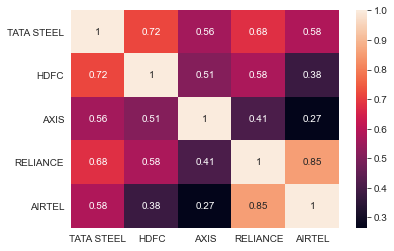

In [75]:
sns.heatmap(closing_df.corr(),annot=True)


### How much value do we put at risk by investing in a particular stock?

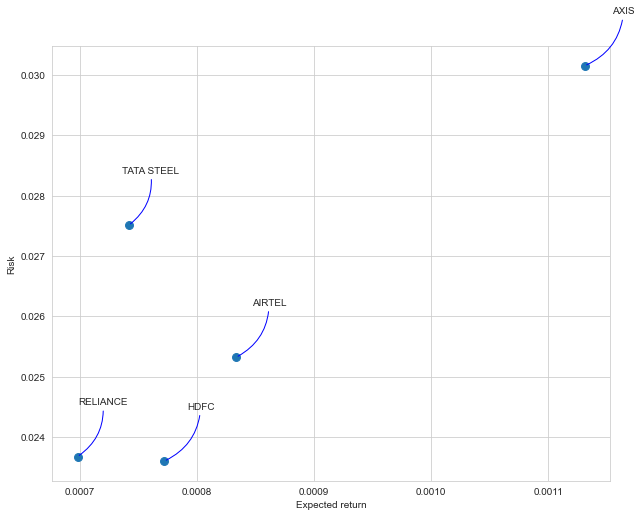

In [76]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = close_ret.dropna()

area = np.pi*20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Total Treads Of Each Stock

In [77]:
tatas['Total Traded'] = tatas['Volume'] * tatas['Open']
axi['Total Traded'] = axi['Volume'] * axi['Open']
airtel['Total Traded'] = airtel['Volume'] * airtel['Open']
reliance['Total Traded'] = reliance['Volume'] * reliance['Open']
hdfc['Total Traded'] = hdfc['Volume'] * hdfc['Open']

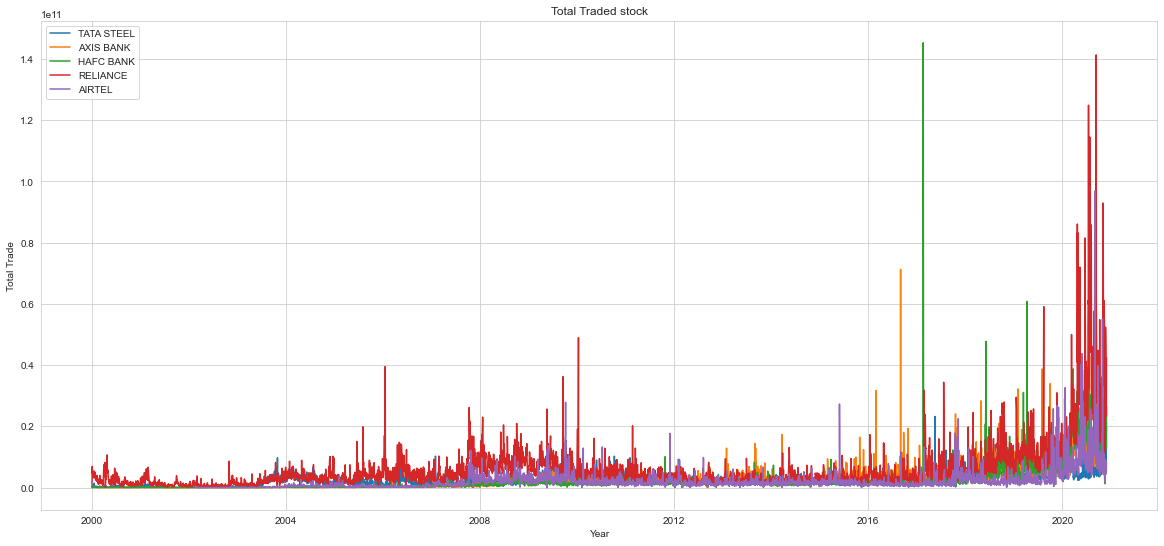

In [78]:
plt.figure(figsize=(20,9))
plt.plot(tatas['Total Traded'],label='TATA STEEL')
plt.plot(axi['Total Traded'],label='AXIS BANK')
plt.plot(hdfc['Total Traded'],label='HAFC BANK')
plt.plot(reliance['Total Traded'],label='RELIANCE')
plt.plot(airtel['Total Traded'],label='AIRTEL')
plt.grid(True)
plt.title('Total Traded stock')
plt.xlabel('Year')
plt.ylabel('Total Trade')
plt.legend()
plt.show()

### Moving average of stock 

In [79]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    tatas[column_name]= tatas['Close'].rolling(ma).mean()
    axi[column_name]= axi['Close'].rolling(ma).mean()
    hdfc[column_name]= hdfc['Close'].rolling(ma).mean()
    reliance[column_name]= reliance['Close'].rolling(ma).mean()
    airtel[column_name]= airtel['Close'].rolling(ma).mean()

In [80]:
airtel.tail()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2020-11-23  BHARTIARTL     EQ      483.70  486.75  486.75  475.10  476.75   
2020-11-24  BHARTIARTL     EQ      477.25  478.40  481.25  471.20  475.50   
2020-11-25  BHARTIARTL     EQ      474.25  476.50  477.90  458.65  464.30   
2020-11-26  BHARTIARTL     EQ      464.10  468.70  469.65  460.10  469.00   
2020-11-27  BHARTIARTL     EQ      468.40  468.30  472.65  462.00  465.00   

             Close    VWAP    Volume      Turnover   diff  Total Traded  \
Date                                                                      
2020-11-23  477.25  479.21  10005675  4.794770e+14   9.50  4.870262e+09   
2020-11-24  474.25  475.07   9173967  4.358260e+14   4.15  4.388826e+09   
2020-11-25  464.10  467.61  14229948  6.654010e+14  12.40  6.780570e+09   
2020-11-26  468.40  465.71  11322533  5.273040e+14   0.30  5.306871e+09   
2020-11-27  463.25  465.57  18151096  8.450530e+14   5.05  8.500158e+09   

            MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                        
2020-11-23         477.455        464.4175         447.117  
2020-11-24         478.240        466.4625         447.120  
2020-11-25         476.790        467.0750         446.691  
2020-11-26         475.645        467.9550         446.424  
2020-11-27         474.395        469.4300         446.109

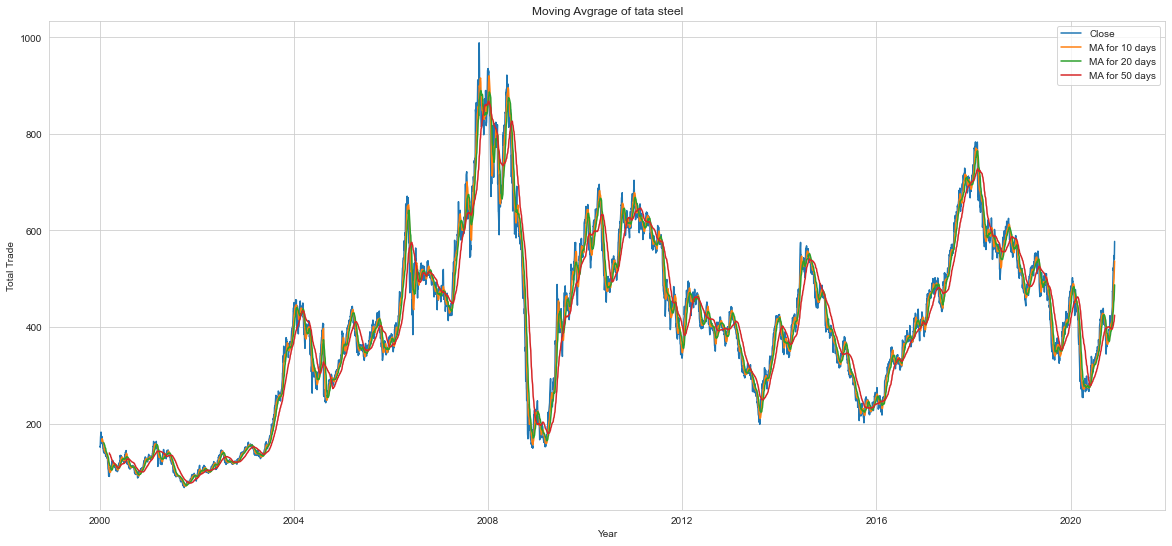

In [81]:
plt.figure(figsize=(20,9))
plt.plot(tatas['Close'],label='Close')
plt.plot(tatas['MA for 10 days'],label='MA for 10 days')
plt.plot(tatas['MA for 20 days'],label='MA for 20 days')
plt.plot(tatas['MA for 50 days'],label='MA for 50 days')
plt.grid(True)
plt.title('Moving Avgrage of tata steel')
plt.xlabel('Year')
plt.ylabel('Total Trade')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

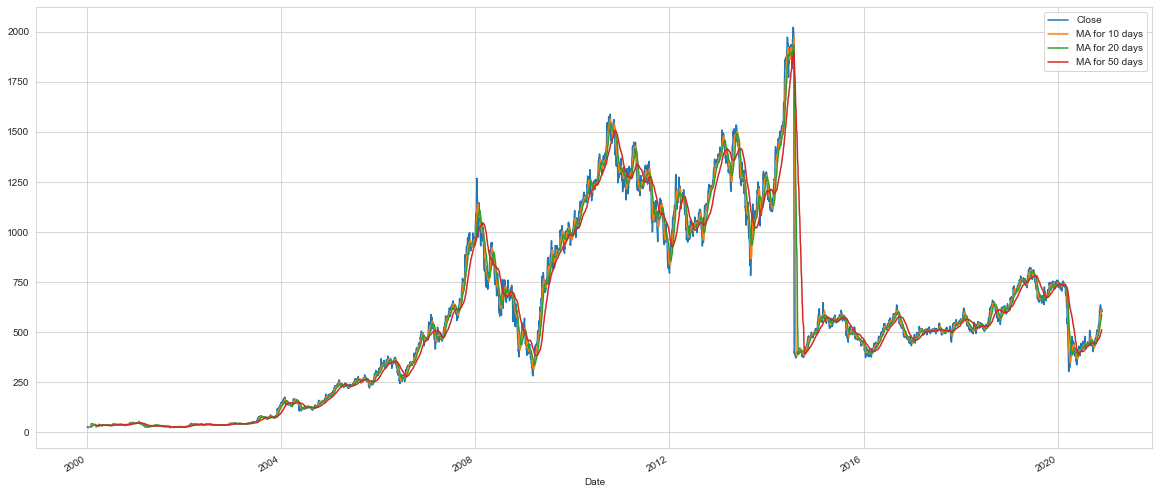

In [82]:
axi[['Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(figsize=(20,9),grid=True)

<AxesSubplot:xlabel='Date'>

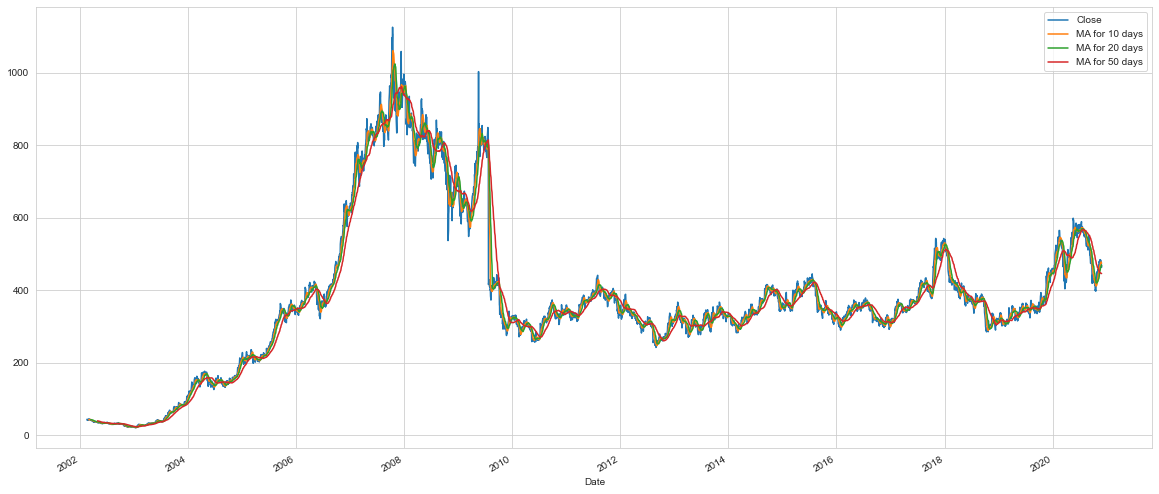

In [83]:
airtel[['Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(figsize=(20,9),grid=True)

<AxesSubplot:xlabel='Date'>

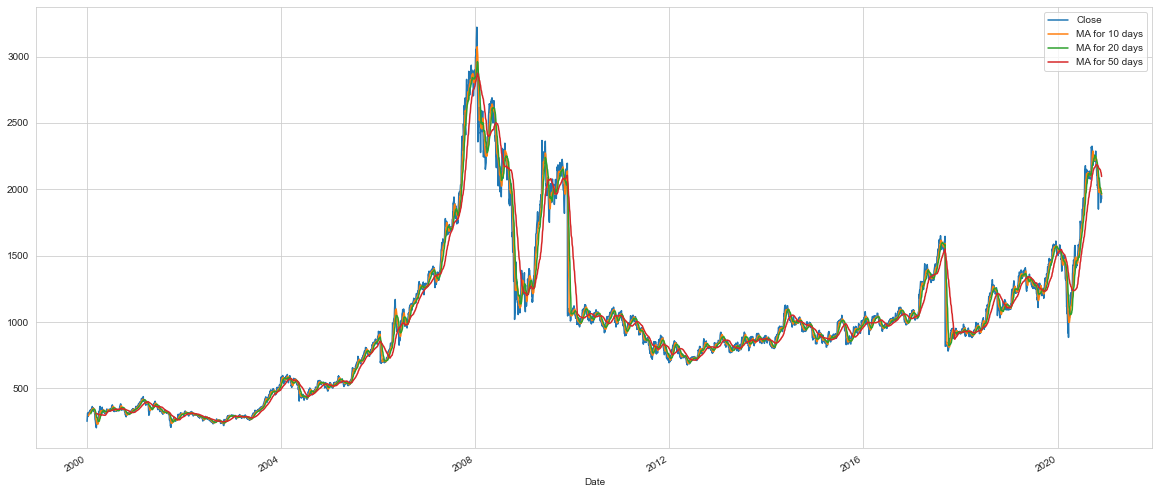

In [84]:
reliance[['Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(figsize=(20,9),grid=True)

<AxesSubplot:xlabel='Date'>

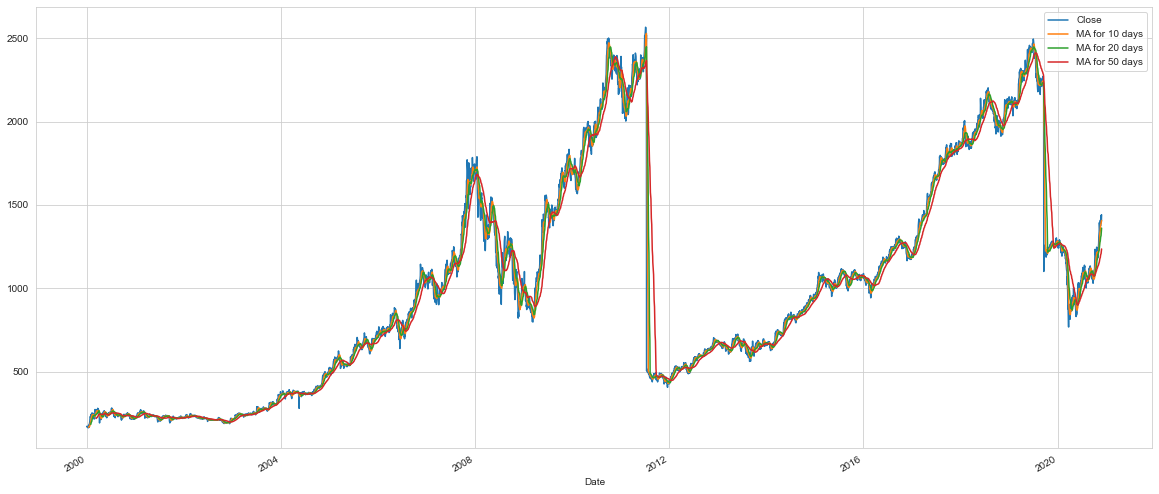

In [85]:
hdfc[['Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(figsize=(20,9),grid=True)

In [86]:
airtel_temp['Cumulative Return'] = (1 + airtel_temp['Return']).cumprod()
hdfc_temp['Cumulative Return'] = (1 + hdfc_temp['Return']).cumprod()
axi_temp['Cumulative Return'] = (1 + axi_temp['Return']).cumprod()
tatas_temp['Cumulative Return'] = (1 + tatas_temp['Return']).cumprod()
reliance_temp['Cumulative Return'] = (1 + reliance_temp['Return']).cumprod()
reliance_temp.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                      
2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

             Close    VWAP    Volume      Turnover   diff    Return  \
Date                                                                  
2000-01-03  251.70  249.37   4456424  1.111320e+14 -14.20  0.000000   
2000-01-04  271.85  263.52   9487878  2.500220e+14 -13.45  0.080056   
2000-01-05  282.50  274.79  26833684  7.373700e+14 -25.85  0.039176   
2000-01-06  294.35  295.45  15682286  4.633250e+14  -5.35  0.041947   
2000-01-07  314.55  308.91  19870977  6.138390e+14 -19.55  0.068626   

            Cumulative Return  
Date                           
2000-01-03           1.000000  
2000-01-04           1.080056  
2000-01-05           1.122368  
2000-01-06           1.169448  
2000-01-07           1.249702

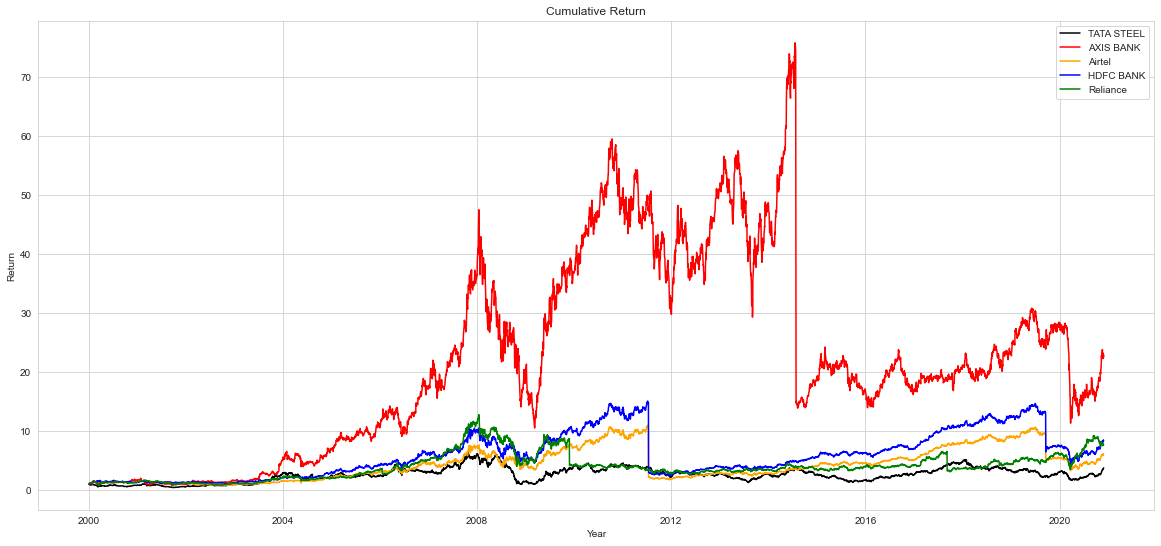

In [87]:
plt.figure(figsize=(20,9))
plt.plot(tatas_temp.index, tatas_temp['Cumulative Return'], color='black',label='TATA STEEL')
plt.plot(axi_temp.index, axi_temp['Cumulative Return'],color='red',label='AXIS BANK')
plt.plot(airtel_temp.index, airtel_temp['Cumulative Return'],color='orange',label='Airtel')
plt.plot(hdfc_temp.index, hdfc_temp['Cumulative Return'],color='blue',label='HDFC BANK')
plt.plot(reliance_temp.index, reliance_temp['Cumulative Return'],color='green',label='Reliance')
plt.grid(True)
plt.title('Cumulative Return')
plt.xlabel('Year')
plt.ylabel('Return')
plt.legend()
plt.show()

### Candle Graph Of All Stock

In [88]:
tatas_reset = tatas_temp.loc['2020-11'].reset_index()
axi_reset = axi_temp.loc['2020-11'].reset_index()
hdfc_reset = hdfc_temp.loc['2020-11'].reset_index()
reliance_reset = reliance_temp.loc['2020-11'].reset_index()
airtel_reset = airtel_temp.loc['2020-11'].reset_index()

In [89]:
tatas_reset['date_ax'] = tatas_reset['Date'].apply(lambda date: date2num(date))
axi_reset['date_ax'] = tatas_reset['Date'].apply(lambda date: date2num(date))
hdfc_reset['date_ax'] = tatas_reset['Date'].apply(lambda date: date2num(date))
reliance_reset['date_ax'] = tatas_reset['Date'].apply(lambda date: date2num(date))
airtel_reset['date_ax'] = tatas_reset['Date'].apply(lambda date: date2num(date))

In [90]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
tatas_values = [tuple(vals) for vals in tatas_reset[list_of_cols].values]

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
axi_values = [tuple(vals) for vals in axi_reset[list_of_cols].values]

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
hdfc_values = [tuple(vals) for vals in hdfc_reset[list_of_cols].values]

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
reliance_values = [tuple(vals) for vals in reliance_reset[list_of_cols].values]

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
airtel_values = [tuple(vals) for vals in airtel_reset[list_of_cols].values]

In [91]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()              
weekFormatter = DateFormatter('%b %d')  
dayFormatter = DateFormatter('%d')

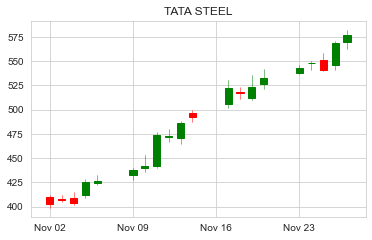

In [92]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.set_title("TATA STEEL")
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, tatas_values, width=0.6, colorup='green', colordown='red');

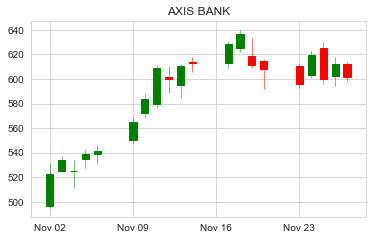

In [93]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.set_title("AXIS BANK")
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, axi_values, width=0.6, colorup='green', colordown='red');

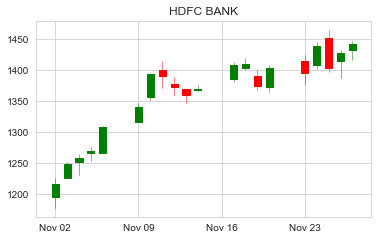

In [94]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.set_title("HDFC BANK")
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, hdfc_values, width=0.6, colorup='green', colordown='red');

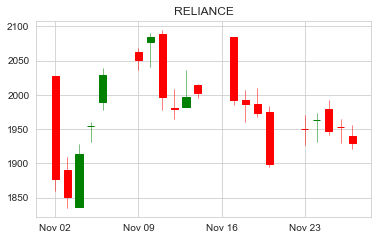

In [95]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.set_title("RELIANCE")
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, reliance_values, width=0.6, colorup='green', colordown='red');

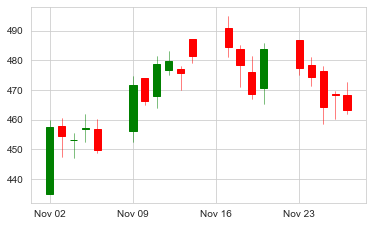

In [96]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, airtel_values, width=0.6, colorup='green', colordown='red');

## <center> Predict Stock Price </center>

### LinearRegression Algorithm

In [97]:
def MyLinearRegressionModel(dataframe,mytitle):
    x = dataframe[['Open','High','Low','Volume']]
    y = dataframe['Close']
    x_train , x_test, y_train, y_test = train_test_split(x,y , random_state= 0)
    print("Display x_train Row and Columns ",x_train.shape)
    print("Display x_test Row and Columns ",x_test.shape,"\n")
    model = LinearRegression()
    print("Creating Model ")
    model.fit(x_train,y_train)
    print("Calculating Coefficient",model.coef_,"\n")
    print("Calculating Intercept",model.intercept_,"\n")
    predicted = model.predict(x_test)
    print("printing value of x_test of ",mytitle)
    print(x_test.head(3))
    predicted.shape
    df =pd.DataFrame(y_test,predicted)
    p_df = pd.DataFrame({"Actual" : y_test, "Predicted":predicted})
    print("\n\nPredicated value of ",mytitle)
    print(p_df.tail(10))
    model.score(x_test,y_test)
    print("\n\nMean Absolute Error : ",metrics.mean_absolute_error(y_test,predicted))
    print("\nMean Squared Error : ",metrics.mean_squared_error(y_test,predicted))
    print("\nRoot Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test,predicted)))
    

In [98]:
MyLinearRegressionModel(tatas,"TATA STEEL")

Display x_train Row and Columns  (3903, 4)
Display x_test Row and Columns  (1301, 4) 

Creating Model 
Calculating Coefficient [-5.52995375e-01  7.90849849e-01  7.62012786e-01  3.49190724e-08] 

Calculating Intercept -0.47248581496086217 

printing value of x_test of  TATA STEEL
             Open    High     Low   Volume
Date                                      
2018-12-28  508.2  516.45  508.05  6307408
2019-05-30  493.0  496.45  486.00  7204363
2006-01-24  358.1  366.70  354.10  2938094


Predicated value of  TATA STEEL
            Actual   Predicted
Date                          
2020-01-24  483.40  480.887323
2012-08-10  400.10  401.149164
2019-02-19  470.95  477.173848
2018-02-26  680.20  684.581062
2002-01-16  103.60  103.181763
2020-07-03  329.90  329.499944
2008-02-13  758.10  748.007275
2010-01-08  648.45  651.335016
2018-02-28  671.60  669.421988
2005-06-03  349.70  346.729806


Mean Absolute Error :  2.798902179313901

Mean Squared Error :  26.112062004247896

Root Mean Squ

In [99]:
MyLinearRegressionModel(axi,"AXIS BANK")

Display x_train Row and Columns  (3903, 4)
Display x_test Row and Columns  (1301, 4) 

Creating Model 
Calculating Coefficient [-5.32674240e-01  8.24073757e-01  7.06965965e-01 -2.47937226e-10] 

Calculating Intercept -0.15357970540446786 

printing value of x_test of  AXIS BANK
              Open   High     Low   Volume
Date                                      
2018-12-28  623.90  628.0  620.00  6372911
2019-05-30  803.25  814.2  803.25  6414384
2006-01-24  345.00  369.4  334.05   489406


Predicated value of  AXIS BANK
             Actual    Predicted
Date                            
2020-01-24   737.40   735.021296
2012-08-10  1070.00  1055.123901
2019-02-19   693.05   699.402385
2018-02-26   552.30   549.536221
2002-01-16    28.35    28.075321
2020-07-03   428.45   425.965164
2008-02-13   967.00   986.414577
2010-01-08  1015.95  1010.432128
2018-02-28   528.75   525.134605
2005-06-03   232.45   229.974285


Mean Absolute Error :  3.9932479369673177

Mean Squared Error :  48.3442840

In [100]:
MyLinearRegressionModel(reliance,"Reliance")

Display x_train Row and Columns  (3903, 4)
Display x_test Row and Columns  (1301, 4) 

Creating Model 
Calculating Coefficient [-5.18556138e-01  7.82592080e-01  7.35798355e-01 -4.09706465e-08] 

Calculating Intercept -0.5176414769027815 

printing value of x_test of  Reliance
               Open     High      Low    Volume
Date                                           
2018-12-28  1125.50  1135.25  1121.20   7666016
2019-05-30  1316.25  1342.00  1316.25  10740841
2006-01-24   710.00   714.00   688.95  11312904


Predicated value of  Reliance
             Actual    Predicted
Date                            
2020-01-24  1521.55  1527.055074
2012-08-10   782.10   783.210622
2019-02-19  1216.10  1229.003523
2018-02-26   938.70   941.020138
2002-01-16   320.25   318.948747
2020-07-03  1787.90  1780.078690
2008-02-13  2389.50  2431.653432
2010-01-08  1103.15  1102.866704
2018-02-28   954.55   950.916982
2005-06-03   553.15   548.766196


Mean Absolute Error :  5.8527904721759825

Mean Squar

In [101]:
MyLinearRegressionModel(hdfc,"HDFC BANK")

Display x_train Row and Columns  (3903, 4)
Display x_test Row and Columns  (1301, 4) 

Creating Model 
Calculating Coefficient [-4.67134314e-01  7.46560828e-01  7.20582370e-01  5.21757912e-08] 

Calculating Intercept 0.26060145229325826 

printing value of x_test of  HDFC BANK
               Open     High      Low   Volume
Date                                          
2018-12-28  2117.35  2137.75  2115.50  2353903
2019-05-30  2416.00  2447.90  2413.05  2339800
2006-01-24   722.00   729.00   713.55   634509


Predicated value of  HDFC BANK
             Actual    Predicted
Date                            
2020-01-24  1244.55  1247.580806
2012-08-10   602.15   605.362320
2019-02-19  2084.05  2095.535243
2018-02-26  1911.55  1905.094368
2002-01-16   230.90   235.321601
2020-07-03  1073.95  1079.507256
2008-02-13  1468.50  1469.026411
2010-01-08  1715.05  1712.897172
2018-02-28  1884.20  1885.962415
2005-06-03   545.80   542.257333


Mean Absolute Error :  5.146940521347566

Mean Squared E

In [102]:
MyLinearRegressionModel(airtel,"Airtel")

Display x_train Row and Columns  (3504, 4)
Display x_test Row and Columns  (1168, 4) 

Creating Model 
Calculating Coefficient [-3.45599059e-01  7.51016250e-01  5.92898534e-01 -6.29471606e-08] 

Calculating Intercept 0.023013561207562816 

printing value of x_test of  Airtel
             Open   High    Low   Volume
Date                                    
2003-08-29   68.9   70.0   66.1  1231443
2007-11-21  905.0  917.4  880.0  5985987
2007-03-09  764.0  767.0  736.9  1470279


Predicated value of  Airtel
            Actual   Predicted
Date                          
2015-02-25  348.60  347.544836
2011-10-04  369.90  373.243862
2017-11-01  539.10  530.260917
2010-10-21  337.10  333.572425
2015-05-12  391.55  393.126028
2012-06-25  308.85  310.029275
2007-06-08  815.50  812.947487
2015-05-28  403.00  404.292999
2011-10-17  380.05  382.180877
2011-02-16  328.40  328.714752


Mean Absolute Error :  3.020663357310934

Mean Squared Error :  33.196216651137924

Root Mean Squared Error :  5.76

### Random Forest Algorithm

In [103]:
# creating our own function 
def MyPrediction(dataframe,MyTitle):
    data = dataframe.copy()
    data['Open-Close'] = (data.Open - data.Close)/data.Open
    data['High-Low'] = (data.High - data.Low)/data.Low
    data['percent_change'] = data['Close'].pct_change()
    data['std_5'] = data['percent_change'].rolling(5).std()
    data['ret_5'] = data['percent_change'].rolling(5).mean()
    data.dropna(inplace=True)

    # X is the input variable
    X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

    # Y is the target or output variable
    y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)


    # Total dataset length
    dataset_length = data.shape[0]

    # Training dataset length
    split = int(dataset_length * 0.75)
    print("Training dataset length := {} \n".format(split))
    # Splitiing the X and y into train and test datasets
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Print the size of the train and test dataset
    print("the size of the X_train ={} and X_test  ={}dataset ".format(X_train.shape, X_test.shape))
    print("the size of the Y_train ={} and Y_test  ={}dataset ".format(y_train.shape, y_test.shape),"\n")
    clf = RandomForestClassifier(random_state=5)
    # Create the model on train dataset

    model = clf.fit(X_train, y_train)

    print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)
    # Run the code to view the classification report metrics
    print("\nThe classification report metrics")
    report = classification_report(y_test, model.predict(X_test))
    print(report,"\n")
    
    data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)
    plt.figure(figsize=(20,9))
    data.strategy_returns[split:].hist()
    plt.xlabel('Strategy returns', fontsize=18)
    plt.title(MyTitle,fontsize=18)
    plt.show()
    print("\n\n")
    plt.figure(figsize=(20,9))
    (data.strategy_returns[split:]+1).cumprod().plot()
    plt.ylabel('Strategy returns (%)',fontsize=18)
    plt.xlabel('Date',fontsize=18)
    plt.title(MyTitle,fontsize=18)
    plt.show()
    


Training dataset length := 3866 

the size of the X_train =(3866, 4) and X_test  =(1289, 4)dataset 
the size of the Y_train =(3866,) and Y_test  =(1289,)dataset  

Correct Prediction (%):  48.642358417377814

The classification report metrics
              precision    recall  f1-score   support

          -1       0.46      0.51      0.48       613
           1       0.51      0.47      0.49       676

    accuracy                           0.49      1289
   macro avg       0.49      0.49      0.49      1289
weighted avg       0.49      0.49      0.49      1289
 



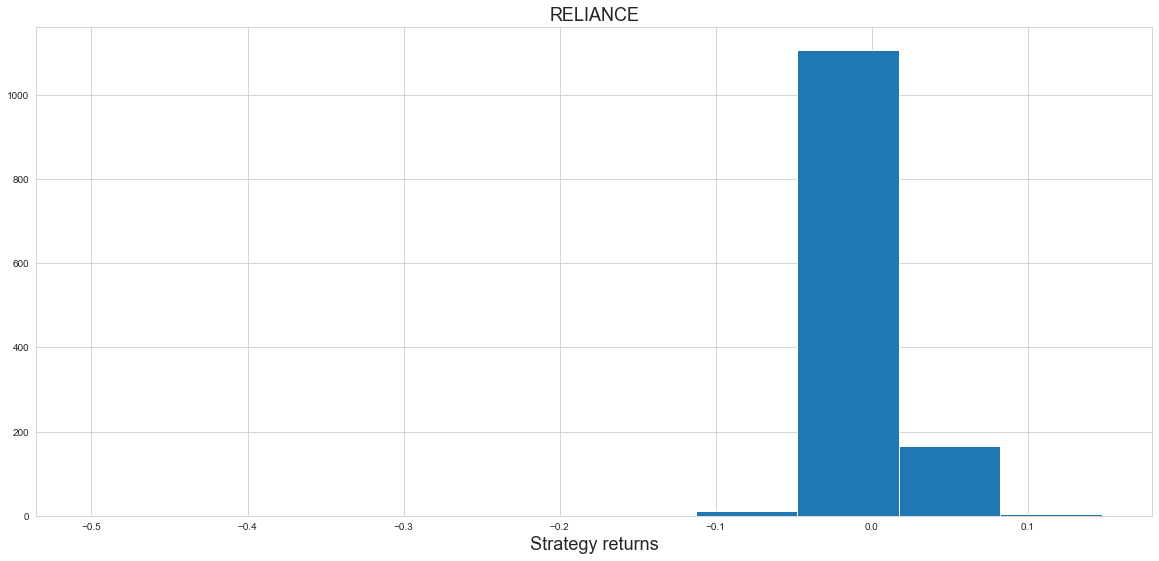

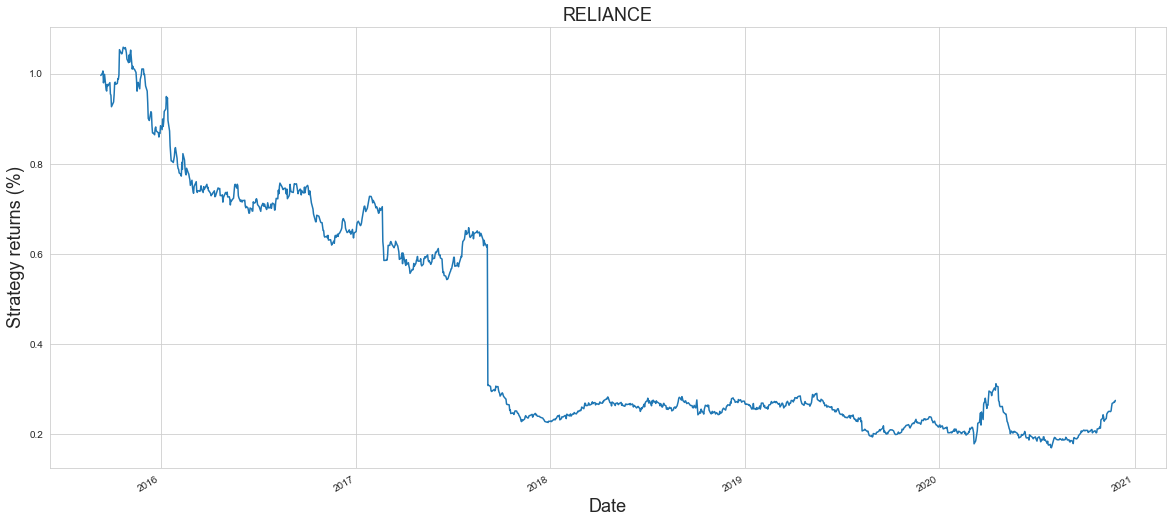

In [104]:
MyPrediction(reliance,"RELIANCE")

Training dataset length := 3866 

the size of the X_train =(3866, 4) and X_test  =(1289, 4)dataset 
the size of the Y_train =(3866,) and Y_test  =(1289,)dataset  

Correct Prediction (%):  52.13343677269201

The classification report metrics
              precision    recall  f1-score   support

          -1       0.51      0.52      0.52       633
           1       0.53      0.52      0.53       656

    accuracy                           0.52      1289
   macro avg       0.52      0.52      0.52      1289
weighted avg       0.52      0.52      0.52      1289
 



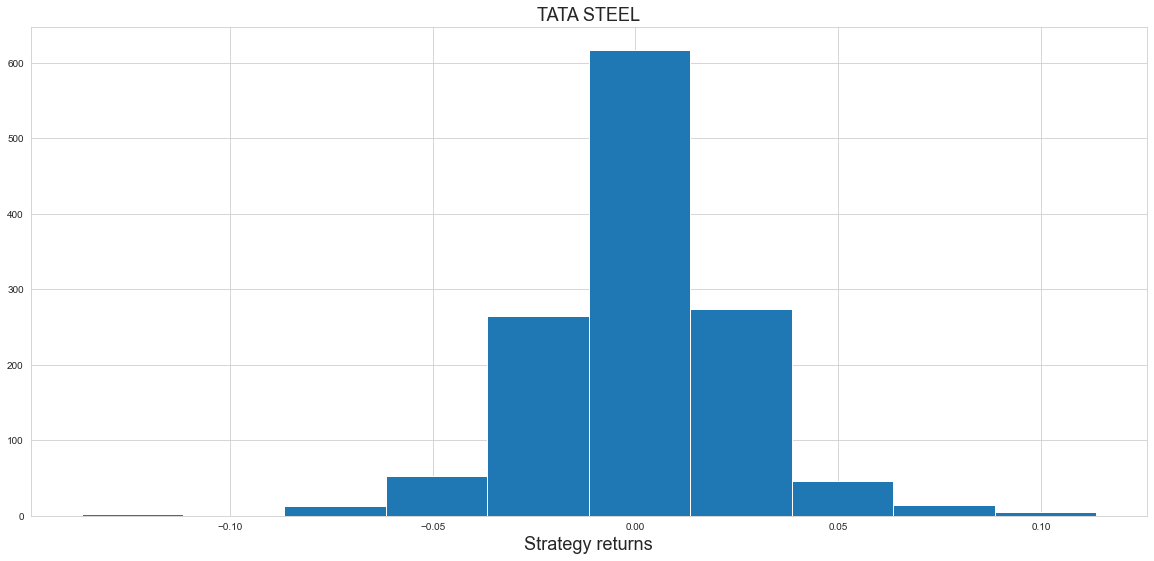

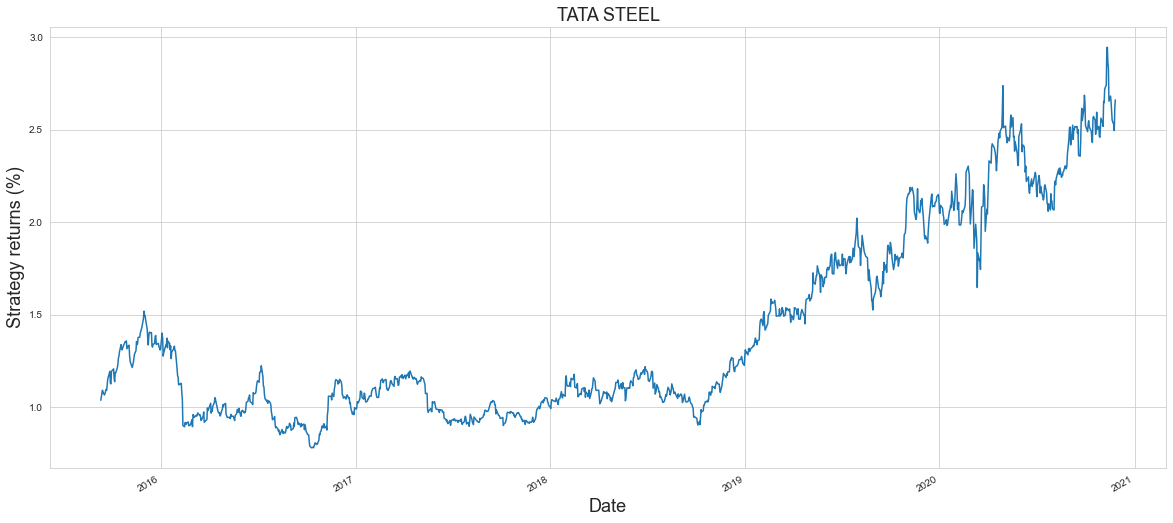

In [105]:
MyPrediction(tatas,"TATA STEEL")

Training dataset length := 3866 

the size of the X_train =(3866, 4) and X_test  =(1289, 4)dataset 
the size of the Y_train =(3866,) and Y_test  =(1289,)dataset  

Correct Prediction (%):  50.27152831652444

The classification report metrics
              precision    recall  f1-score   support

          -1       0.50      0.48      0.49       645
           1       0.50      0.52      0.51       644

    accuracy                           0.50      1289
   macro avg       0.50      0.50      0.50      1289
weighted avg       0.50      0.50      0.50      1289
 



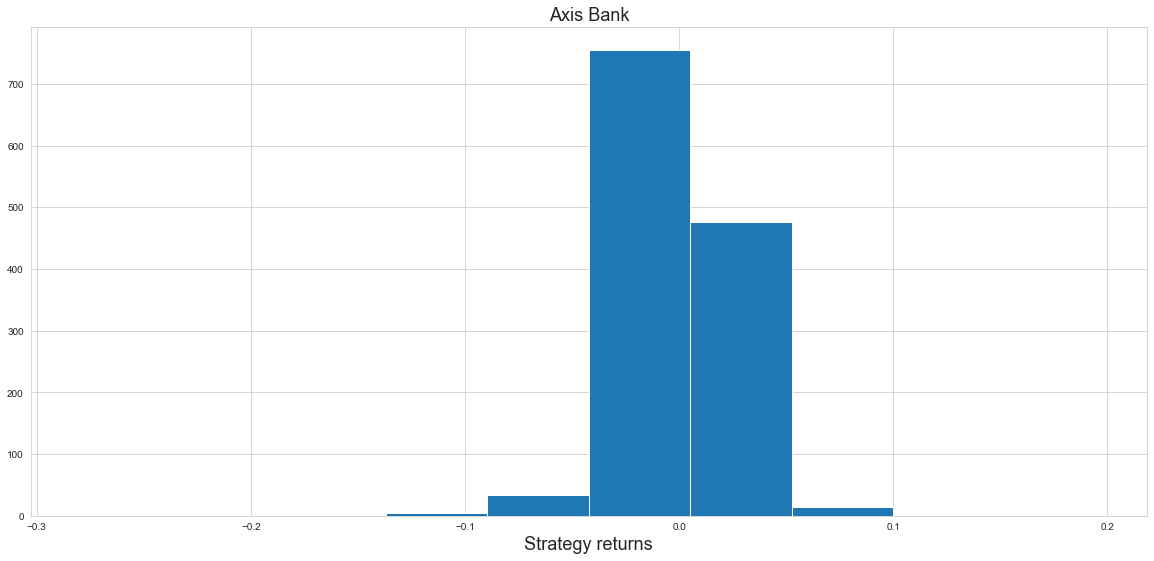

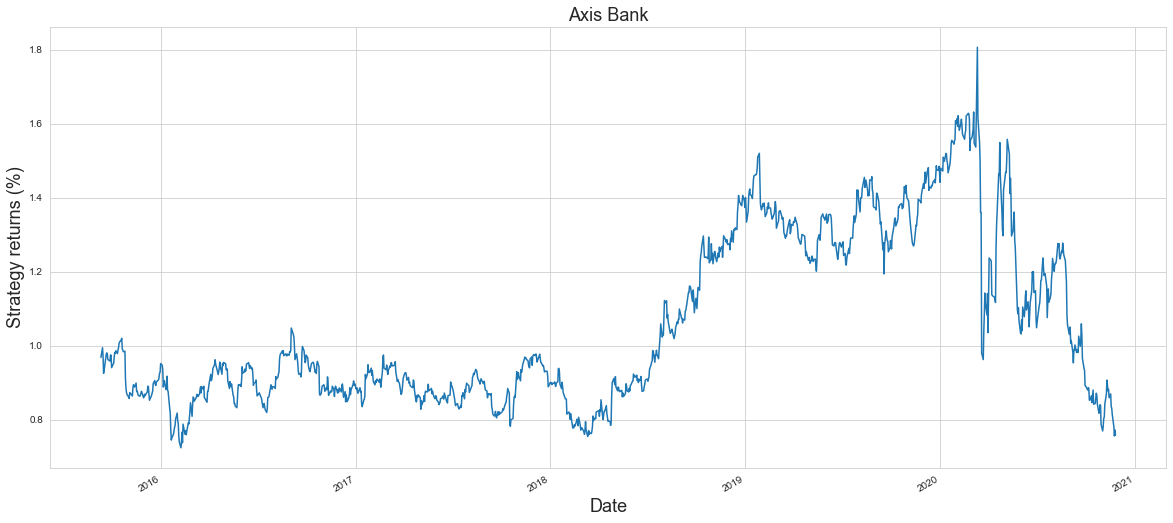

In [106]:
MyPrediction(axi,"Axis Bank")

Training dataset length := 3866 

the size of the X_train =(3866, 4) and X_test  =(1289, 4)dataset 
the size of the Y_train =(3866,) and Y_test  =(1289,)dataset  

Correct Prediction (%):  51.12490302560124

The classification report metrics
              precision    recall  f1-score   support

          -1       0.49      0.51      0.50       613
           1       0.54      0.51      0.52       676

    accuracy                           0.51      1289
   macro avg       0.51      0.51      0.51      1289
weighted avg       0.51      0.51      0.51      1289
 



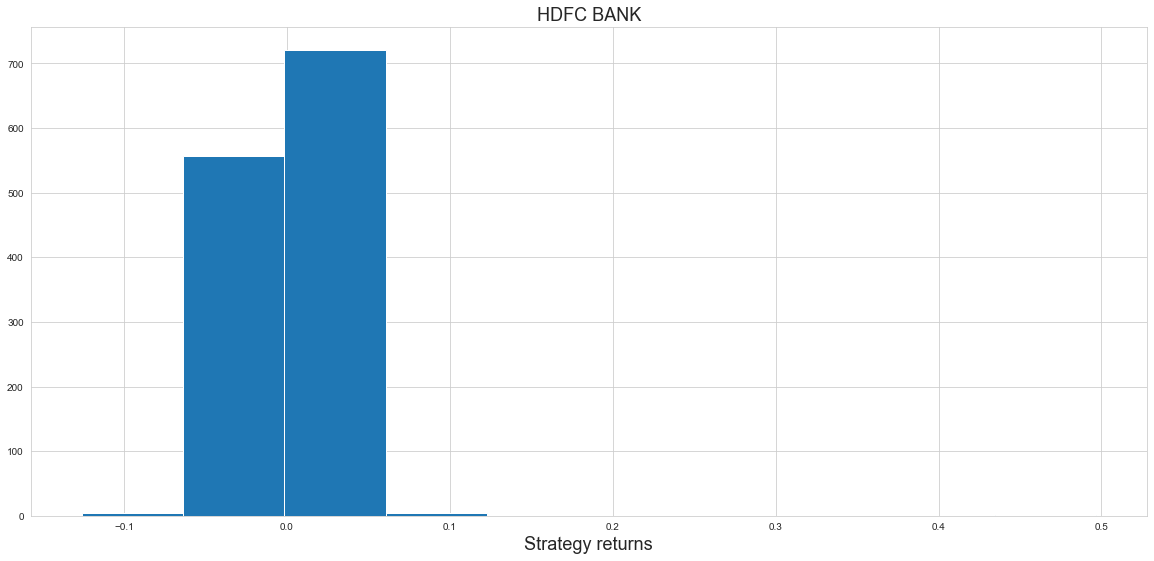

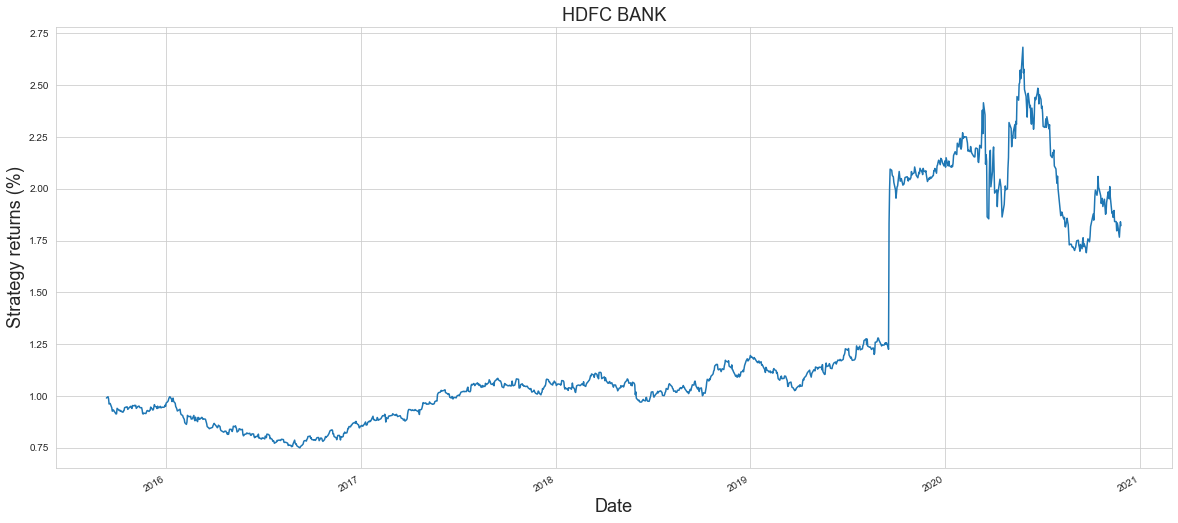

In [107]:
MyPrediction(hdfc,"HDFC BANK")

Training dataset length := 3467 

the size of the X_train =(3467, 4) and X_test  =(1156, 4)dataset 
the size of the Y_train =(3467,) and Y_test  =(1156,)dataset  

Correct Prediction (%):  52.162629757785474

The classification report metrics
              precision    recall  f1-score   support

          -1       0.54      0.55      0.54       600
           1       0.50      0.49      0.50       556

    accuracy                           0.52      1156
   macro avg       0.52      0.52      0.52      1156
weighted avg       0.52      0.52      0.52      1156
 



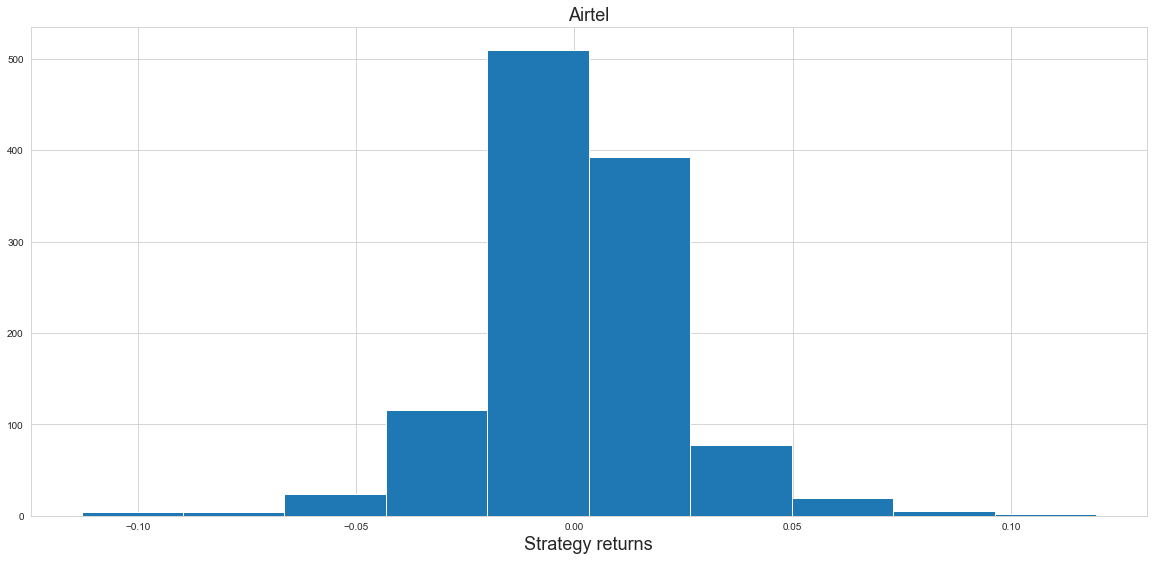

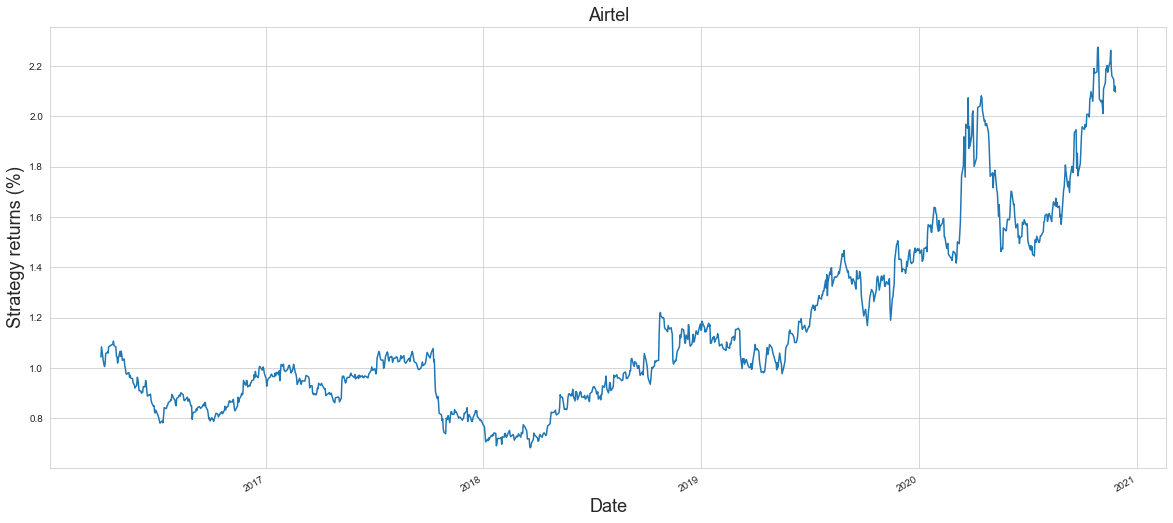

In [108]:
MyPrediction(airtel,"Airtel")

# <center><img src="thank.png" width="900px" height="500px"></center>